# Motivation

**What data are we working with?**

The domain this project explores is different posts on Reddit found on the subreddit 'Change My View', or r/CMV, where users regularly post controversial questions and discussions in the community.


**What is the goal of this work?**

The goal of this project is visualize the distribution of people's emotions and their reactions to posts of different types. We expect their comments' emotions to follow suit relative to the emotions of the post topic, but this is to be explored.

**How is this achieved?**

This is achieved by leveraging the RoBERTa base Go Emotions model found on HuggingFace. This sentiment analysis pipeline is used to get emotions for a given text input, and ranks them by most likely probability (see code for examples). The Go Emotions dataset is comprised of 28 unqiue emotions and was trained on Reddit data, making it and the respective model an ideal candidate for this project's goals.


**Where can I learn more about this project?**

Find the RoBERTa Go Emotions model [link here](https://huggingface.co/SamLowe/roberta-base-go_emotions) (from HuggingFace)

Find the Go Emotions dataset [link here](https://huggingface.co/datasets/go_emotions) (from HuggingFace)



# Install Dependencies

In [211]:
import pandas as pd
import numpy as np
from transformers import pipeline
import matplotlib.pyplot as plt

# Reddit: r/CMV example

**Post title:** 'CMV: It's normal and healthy to still love your ex, even while in a new relationship.'

**Post desc:** 'By the definition of my CMV, I'm ruling out any cases where the "love" borders more on obsession, or where the love gets in the way of the new relationship. This is really a push back against the idea that someone being in contact with their ex is a "red flag". In fact, I believe that still being in contact with an ex can actually be a green flag and can be indicative of a characteristic maturity that allows two adults, who used to be in a relationship, to still be friendly, despite how the relationship may have ended.

It's also important that I make the distinction between love and *in* love. If you're in love with one person, you should not be dating and telling another person you're in love with them - I think this is moving forward with a relationship when you're not emotionally available, and I think that can be incredibly damaging to the new partner. However, loving someone is very different - if you dated someone for years, or maybe even just months, and you developed a strong care for them and their well being, that won't just go away when you stop dating (except in certain more extreme circumstances).

Someone should be able to love their past partner in the sense that they care about them, they remain in contact to see how they're doing and they have a continuing relationship, even while pursuing serious relationships with others.

I'm curious what others think about this.'

**Top Comment 1:** 'If you love someone while you started a new relationship...you weren't ready for that new relationship.'

**Top Comment 2:** 'It's important to consider **why** they are your ex.

If you were dumped, then trying to keep in touch means you haven't moved on and it's a red flag.

If dumped them, it means you are stringing ex along and are being manipulative and it's a red flag.'

**Top Comment 3:** 'I agree with what you're trying to say but the title should have been caring not loving.¬†


You know what the correct word choice is based on your explanation, you know what the possibile connotations are, you've recognized that love is easy to confuse with in love given the context yet you still went with love instead of care...why?'

In [212]:
cmv_df = pd.read_csv('cmv_clean.csv')
# Max emotions represents the total emotions generated for each comment (ie our max)
# Min emotions represents the minimum number of emotions we accept for each comment (threshold)
max_emotions = 6
min_emotions = 3
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=max_emotions)

test_comment_1 = cmv_df.iloc[0]['Comment 1']
test_comment_2 = cmv_df.iloc[0]['Comment 2']
test_comment_3 = cmv_df.iloc[0]['Comment 3']

sentences = [test_comment_1, test_comment_2, test_comment_3]

print("Initial 3 Test Comments")
print("")
count = 1
for sentence in sentences:
  print(f"Comment {count}: {sentence}")
  count += 1

print("")
print("Initial 3 labels")
print("")
for sentence in sentences:
  output = classifier(sentence)
  print(output)

print("")
print("Filtered 3 labels")
print("")

# Builds a list of labels to filter out (if we choose to)
labels_to_exclude = ['neutral']

for sentence in sentences:
    output = classifier(sentence)
    filtered_labels = []
    num_labels = 0

    # Check predictions and filter out labels that are found in the labels_to_exclude
    for prediction in output:
        filtered_predictions = [label for label in prediction if label['label'] not in labels_to_exclude]
        # Check to see if we still need to add more emotions to reach the minimum threshold for classification
        if (num_labels < min_emotions):
          # If we have not reached the min threshold, keep adding emotions
          filtered_labels.append(filtered_predictions)
          num_labels += 1

    print(filtered_labels)

Initial 3 Test Comments

Comment 1: If you love someone while you started a new relationship...you weren't ready for that new relationship.
Comment 2: It's important to consider **why** they are your ex.

If you were dumped, then trying to keep in touch means you haven't moved on and it's a red flag.

If dumped them, it means you are stringing ex along and are being manipulative and it's a red flag.
Comment 3: I agree with what you're trying to say but the title should have been caring not loving. 


You know what the correct word choice is based on your explanation, you know what the possibile connotations are, you've recognized that love is easy to confuse with in love given the context yet you still went with love instead of care...why?

Initial 3 labels

[[{'label': 'neutral', 'score': 0.8108245730400085}, {'label': 'disapproval', 'score': 0.07914366573095322}, {'label': 'realization', 'score': 0.042752474546432495}, {'label': 'disappointment', 'score': 0.021041031926870346}, {'lab

# Data Cleaning and Preprocessing

In [213]:
# Clean CMV data
cmv_df = cmv_df.dropna()
cmv_df = cmv_df.astype(str)
cmv_df = cmv_df.dropna()

# Clean GPT data
df_gpt = pd.read_csv('GPT*.csv')
df_gpt = df_gpt.dropna()
df_gpt = df_gpt.astype(str)
df_gpt = df_gpt.dropna()

# Clean Llama data
df_ll = pd.read_csv('LL*.csv')
df_ll = df_ll.dropna()
df_ll = df_ll.astype(str)
df_ll = df_ll.dropna()

# Clean Zephyr data
df_ze = pd.read_csv('ZE*.csv')
df_ze = df_ze.dropna()
df_ze= df_ze.astype(str)
df_ze = df_ze.dropna()

print(f"cmv_df posts analyzed: {len(cmv_df)}")
print(f"df_gpt comments analyzed: {len(df_gpt)}")
print(f"df_ll comments analyzed: {len(df_ll)}")
print(f"df_ze comments analyzed: {len(df_ze)}")

cmv_df posts analyzed: 843
df_gpt comments analyzed: 3080
df_ll comments analyzed: 3010
df_ze comments analyzed: 3102


# r/CMV data visualized

**Disclaimer:**

All of these posts got truncated at 512 characters due to the Go emotions sentiment model having an upper bound on input tokens. This is just to show the natural state of posts and comments before hand.

Ultimately everything is comparable since it all got truncated to the same length.

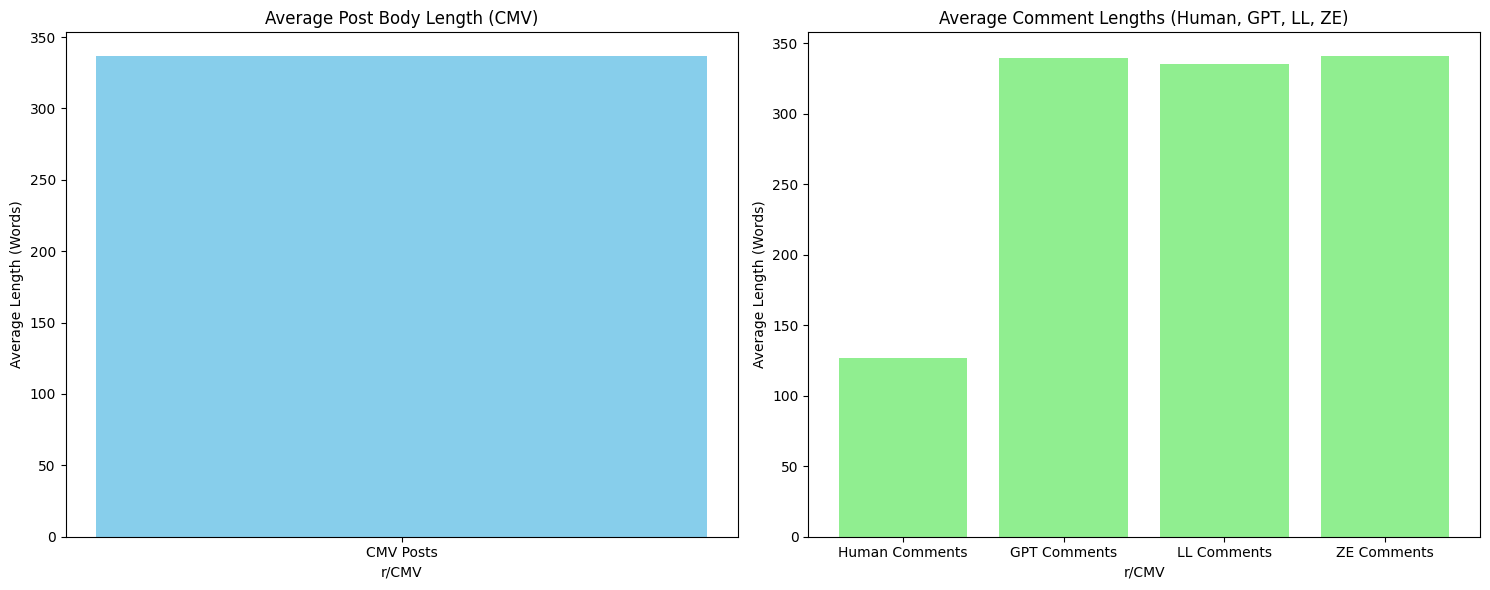

In [214]:
import matplotlib.pyplot as plt

# Calculates average length of comments generated by llms
def average_comment_length_llm(df):
    comment_lengths = df[f'Query'].apply(lambda x: len(x.split()))
    return comment_lengths.mean()

# Calculates average length of comments generated by humans
def average_comment_length_human(df, num_columns=5):
    total_lengths = []  # List to store lengths of all comments

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        comment_lengths = []
        # Iterate over each column from 'Column 1' to 'Column num_columns'
        for col_index in range(1, num_columns + 1):
            column_name = f'Comment {col_index}'
            comment = row[column_name]
            comment_lengths.append(len(comment.split()))  # Calculate length of comment
        total_lengths.extend(comment_lengths)  # Add lengths of comments in the row to total_lengths

    # Calculate mean of all comment lengths
    if total_lengths:
        return sum(total_lengths) / len(total_lengths)
    else:
        return 0  # Return 0 if there are no comments

# Calculate average length of posts in CMV data
average_post_length_cmv = cmv_df['Body'].apply(lambda x: len(x.split())).mean()

# Calculate average length of comments in CMV data
average_comment_length_cmv = average_comment_length_human(cmv_df)

# Calculate average length of comments in GPT data
average_comment_length_gpt = average_comment_length_llm(df_gpt)

# Calculate average length of comments in LL data
average_comment_length_ll = average_comment_length_llm(df_ll)

# Calculate average length of comments in ZE data
average_comment_length_ze = average_comment_length_llm(df_ze)

# Data for visualization
categories_posts = ['CMV Posts']
average_lengths_posts = [average_post_length_cmv]

categories_comments = ['Human Comments', 'GPT Comments', 'LL Comments', 'ZE Comments']
average_lengths_comments = [average_comment_length_cmv, average_comment_length_gpt, average_comment_length_ll, average_comment_length_ze]

# Create separate plots for average post length and average comment lengths
plt.figure(figsize=(15, 6))

# Plot for average post length
plt.subplot(1, 2, 1)
plt.bar(categories_posts, average_lengths_posts, color='skyblue')
plt.xlabel('r/CMV')
plt.ylabel('Average Length (Words)')
plt.title('Average Post Body Length (CMV)')

# Plot for average comment lengths
plt.subplot(1, 2, 2)
plt.bar(categories_comments, average_lengths_comments, color='lightgreen')
plt.xlabel('r/CMV')
plt.ylabel('Average Length (Words)')
plt.title('Average Comment Lengths (Human, GPT, LL, ZE)')

# Show plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Emotions from Human Posts

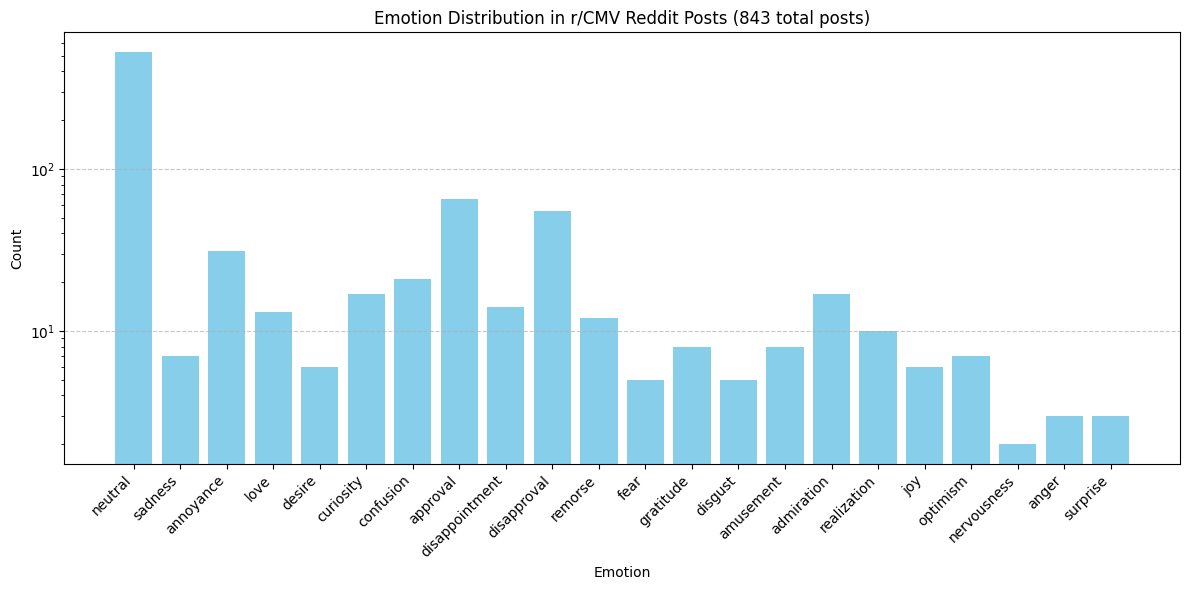

In [215]:
# post_emotions = {}
# classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=5)
# count = 0
# for index, row in cmv_df.iterrows():
#     if (count % 200 == 0):
#         print(post_emotions)
#     post_body = row['Body']
#     post_body = post_body[:512]
#     output = classifier(post_body)
#     top_emotion = output[0][0]['label']
#     count += 1
#     if top_emotion in post_emotions:
#       post_emotions[top_emotion] += 1
#     else:
#       post_emotions[top_emotion] = 1

# print(f"All done analyzed this many posts: {count}")
# print(post_emotions)

# Stored to save on 6 minute compute time
post_emotions_reddit = {
    'neutral': 528,
    'sadness': 7,
    'annoyance': 31,
    'love': 13,
    'desire': 6,
    'curiosity': 17,
    'confusion': 21,
    'approval': 65,
    'disappointment': 14,
    'disapproval': 55,
    'remorse': 12,
    'fear': 5,
    'gratitude': 8,
    'disgust': 5,
    'amusement': 8,
    'admiration': 17,
    'realization': 10,
    'joy': 6,
    'optimism': 7,
    'nervousness': 2,
    'anger': 3,
    'surprise': 3
}

# Emotion data from the provided dictionary
emotions = list(post_emotions_reddit.keys())
counts = list(post_emotions_reddit.values())

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(emotions, counts, color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Emotion Distribution in r/CMV Reddit Posts (843 total posts)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines on y-axis
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

# Aggregating Overall Human Comment Emotions

In [216]:
# import pandas as pd
# from transformers import pipeline

# # Initialize the text classification pipeline found from this link below:
# # https://huggingface.co/SamLowe/roberta-base-go_emotions
# classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=5)

# # Create a new map to store emotion frequencies
# emotion_frequency = {}

# # Initialize counter and total_count to keep track of progress while progressing through batches
# count = 0
# total_count = len(cmv_df)

# for index, row in cmv_df.iterrows():
#     # Collect comments for batch processing
#     for i in range(1, 6):
#         comment = row[f'Comment {i}']
#         if isinstance(comment, str):  # Check if comment is a string
#             comment = comment[:512]  # Limit comment length if needed
#             output = classifier(comment)
#             top_emotion_comment = output[0][0]['label']

#             # Update emotion frequency dictionary
#             if top_emotion_comment not in emotion_frequency:
#                 emotion_frequency[top_emotion_comment] = 1
#             else:
#                 emotion_frequency[top_emotion_comment] += 1

#     # Increment count after processing a row
#     count += 1

#     # Print out progress every 10 rows processed
#     if count > 0 and count % 100 == 0:
#         print(f"Current number of posts analyzed: {count} / {total_count}")
#         print("Emotion Frequencies:")
#         for emotion, freq in emotion_frequency.items():
#             print(f"{emotion}: {freq}")
#         print("")  # Print an empty line for separation


# # Print the final resulting emotion frequencies
# print("")
# print("Final Emotion Frequencies:")
# for emotion, count in emotion_frequency.items():
#     print(f"{emotion}: {count}")


# Final emotion frequencies (to save on 25 minute compute time)
emotion_frequency = {
    'neutral': 2579,
    'approval': 305,
    'confusion': 218,
    'curiosity': 427,
    'annoyance': 116,
    'amusement': 51,
    'love': 19,
    'disapproval': 268,
    'disappointment': 33,
    'admiration': 50,
    'remorse': 11,
    'surprise': 7,
    'nervousness': 2,
    'optimism': 12,
    'realization': 17,
    'joy': 17,
    'anger': 11,
    'caring': 20,
    'desire': 8,
    'disgust': 7,
    'sadness': 11,
    'gratitude': 12,
    'embarrassment': 3,
    'fear': 10,
    'excitement': 1
}

# Aggregating  GPT Response Emotions

In [217]:

# emotion_frequency_gpt = {}

# count = 0

# for index, row in df_gpt.iterrows():
#     batch_comments = []

#     comment = row[f'Query']
#     if isinstance(comment, str):
#         comment = comment[:512]
#         # print(f"Count: {count}")
#         # print(comment)
#         # print("")
#         # print("Response")
#         response = row[f'Response']
#         if isinstance(response, str):
#             response = response[:512]
#             # print(response)

#             output = classifier(response)
#             # print(output)
#             # Grab emotion labels for each output
#             top_emotion_comment = output[0][0]['label']
#             # Update emotion frequency dictionary
#             if top_emotion_comment not in emotion_frequency_gpt:
#                 emotion_frequency_gpt[top_emotion_comment] = 1
#             else:
#                 emotion_frequency_gpt[top_emotion_comment] += 1
#     count += 1

#     if count > 0 and (count / 5) % 100 == 0:
#         print(f"Current number of posts analyzed: {int(count / 5)} / {total_count}")
#         print("Emotion Frequencies:")
#         for emotion, freq in emotion_frequency_gpt.items():
#             print(f"{emotion}: {freq}")
#         print("")  # Print an empty line for separation

# # Print the final resulting emotion frequencies
# print("Final Emotion Frequencies:")
# for emotion, count in emotion_frequency_gpt.items():
#     print(f"{emotion}: {count}")


# Final GPT Emotion Frequencies: (stored to save on 15 minutes compute time)
emotion_frequency_gpt = {
    'caring': 100,
    'approval': 1081,
    'neutral': 1471,
    'sadness': 7,
    'admiration': 82,
    'disapproval': 102,
    'curiosity': 122,
    'excitement': 7,
    'optimism': 29,
    'disappointment': 15,
    'confusion': 11,
    'embarrassment': 1,
    'joy': 25,
    'surprise': 1,
    'realization': 15,
    'love': 3,
    'remorse': 1,
    'fear': 1,
    'annoyance': 5,
    'desire': 1
}

# Aggregating Llama Emotions

In [218]:

# # Create a new map to store emotion frequencies
# emotion_frequency_ll = {}

# count = 0

# for index, row in df_ll.iterrows():
#     batch_comments = []

#     comment = row[f'Query']
#     if isinstance(comment, str):
#         comment = comment[:512]
#         # print(f"Count: {count}")
#         # print(comment)
#         # print("")
#         # print("Response")
#         response = row[f'Response']
#         if isinstance(response, str):
#             response = response[:512]
#             # print(response)

#             output = classifier(response)
#             # print(output)
#             # Grab emotion labels for each output
#             top_emotion_comment = output[0][0]['label']
#             # Update emotion frequency dictionary
#             if top_emotion_comment not in emotion_frequency_ll:
#                 emotion_frequency_ll[top_emotion_comment] = 1
#             else:
#                 emotion_frequency_ll[top_emotion_comment] += 1
#     count += 1

#     if count > 0 and (count / 5) % 100 == 0:
#         print(f"Current number of posts analyzed: {int(count / 5)} / {total_count}")
#         print("Emotion Frequencies:")
#         for emotion, freq in emotion_frequency_ll.items():
#             print(f"{emotion}: {freq}")
#         print("")  # Print an empty line for separation

# # Print the final resulting emotion frequencies
# print("Final Emotion Frequencies:")
# for emotion, count in emotion_frequency_ll.items():
#     print(f"{emotion}: {count}")


# Final Llama Emotion Frequencies: (stored to save on 15 minutes compute time)
emotion_frequency_ll = {
    'neutral': 2266,
    'approval': 440,
    'desire': 4,
    'fear': 1,
    'admiration': 59,
    'curiosity': 13,
    'joy': 10,
    'love': 7,
    'caring': 40,
    'excitement': 1,
    'annoyance': 30,
    'disapproval': 81,
    'disappointment': 33,
    'confusion': 7,
    'embarrassment': 1,
    'remorse': 2,
    'optimism': 1,
    'amusement': 3,
    'surprise': 1,
    'disgust': 1,
    'nervousness': 3,
    'sadness': 2,
    'pride': 1,
    'realization': 2,
    'gratitude': 1
}


# Aggregating Zephyr

In [219]:

# # Create a new map to store emotion frequencies
# emotion_frequency_ze = {}

# count = 0

# for index, row in df_ze.iterrows():
#     batch_comments = []

#     comment = row[f'Query']
#     if isinstance(comment, str):
#         comment = comment[:512]
#         # print(f"Count: {count}")
#         # print(comment)
#         # print("")
#         # print("Response")
#         response = row[f'Response']
#         if isinstance(response, str):
#             response = response[:512]
#             # print(response)

#             output = classifier(response)
#             # print(output)
#             # Grab emotion labels for each output
#             top_emotion_comment = output[0][0]['label']
#             # Update emotion frequency dictionary
#             if top_emotion_comment not in emotion_frequency_ze:
#                 emotion_frequency_ze[top_emotion_comment] = 1
#             else:
#                 emotion_frequency_ze[top_emotion_comment] += 1
#     count += 1

#     if count > 0 and (count / 5) % 100 == 0:
#         print(f"Current number of posts analyzed: {int(count / 5)}")
#         print("Emotion Frequencies:")
#         for emotion, freq in emotion_frequency_ze.items():
#             print(f"{emotion}: {freq}")
#         print("")  # Print an empty line for separation

# # Print the final resulting emotion frequencies
# print("Final Emotion Frequencies:")
# for emotion, count in emotion_frequency_ze.items():
#     print(f"{emotion}: {count}")

# Final Zephyr Emotion Frequencies: (to save on 15 minute compute time)
emotion_frequency_ze = {
    'neutral': 2048,
    'disapproval': 50,
    'optimism': 15,
    'approval': 712,
    'admiration': 59,
    'caring': 59,
    'disappointment': 15,
    'joy': 29,
    'nervousness': 5,
    'curiosity': 16,
    'confusion': 34,
    'desire': 8,
    'realization': 11,
    'fear': 3,
    'love': 2,
    'sadness': 14,
    'annoyance': 9,
    'anger': 2,
    'excitement': 2,
    'gratitude': 3,
    'remorse': 5,
    'amusement': 1
}


# Visualize Emotions of all Human Comments on r/CMV

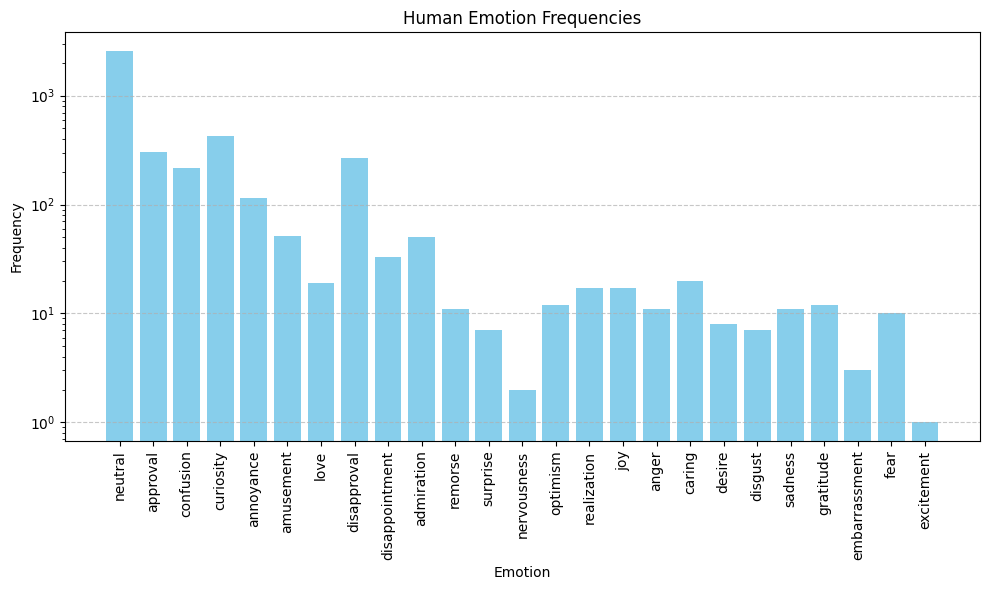

In [220]:
import matplotlib.pyplot as plt

# Extract emotion labels and corresponding frequencies from our final list
emotions = list(emotion_frequency.keys())
frequencies = list(emotion_frequency.values())

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(emotions, frequencies, color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Human Emotion Frequencies')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent label clips
plt.tight_layout()
plt.show()

# Emotions Analysis:

**Neutral Emotion Possibly Overrepresented**
Because understanding the complexity of these responses can be difficult, this is likely the reason that the 'neutral' emotion has such high frequency, and is possibly overrepresented given the actual range of emotions on r/CMV.

**Approval / Disapproval Emotions Common**
Due to the nature of binary discourse on r/CMV, people are generally either for or against a controversial discussion topic, and sometimes will even explicitly state 'I agree' or 'I disagree' in their comment.

**Logical Reasoning and Realization** On r/CMV, it is common to explain and think through the logic of an argument or perspective on a topic. This likely leads to the 'realization' emotion being significantly higher than the other emotions not mentioned above (ie compared to joy, surprise, relief, etc.).

# Visualization of GPT Emotions

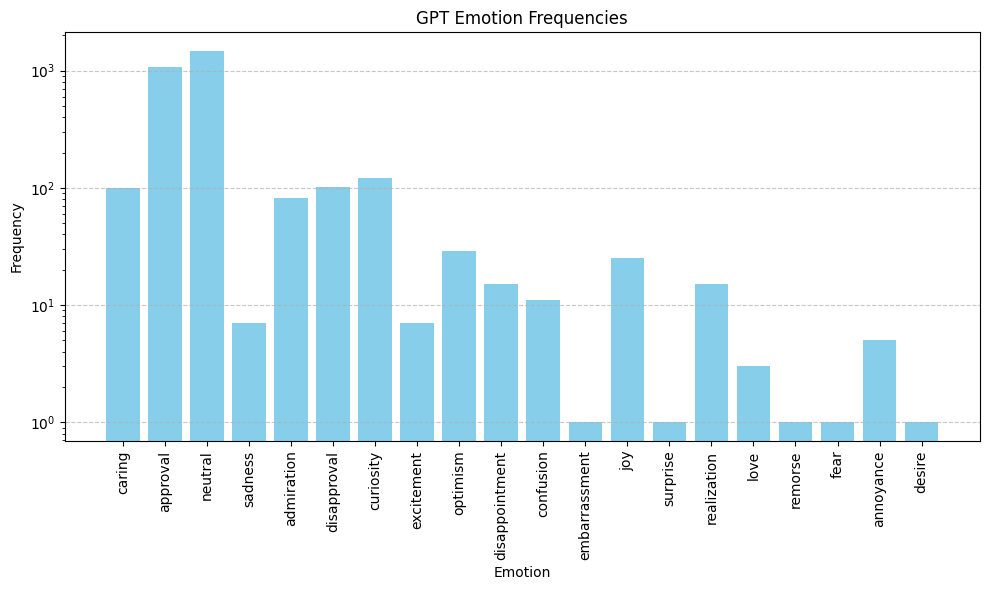

In [221]:
import matplotlib.pyplot as plt

# Extract emotion labels and corresponding frequencies from our final list
emotions = list(emotion_frequency_gpt.keys())
frequencies = list(emotion_frequency_gpt.values())

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(emotions, frequencies, color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('GPT Emotion Frequencies')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent label clips
plt.tight_layout()
plt.show()

# Visualization of Llama Emotions

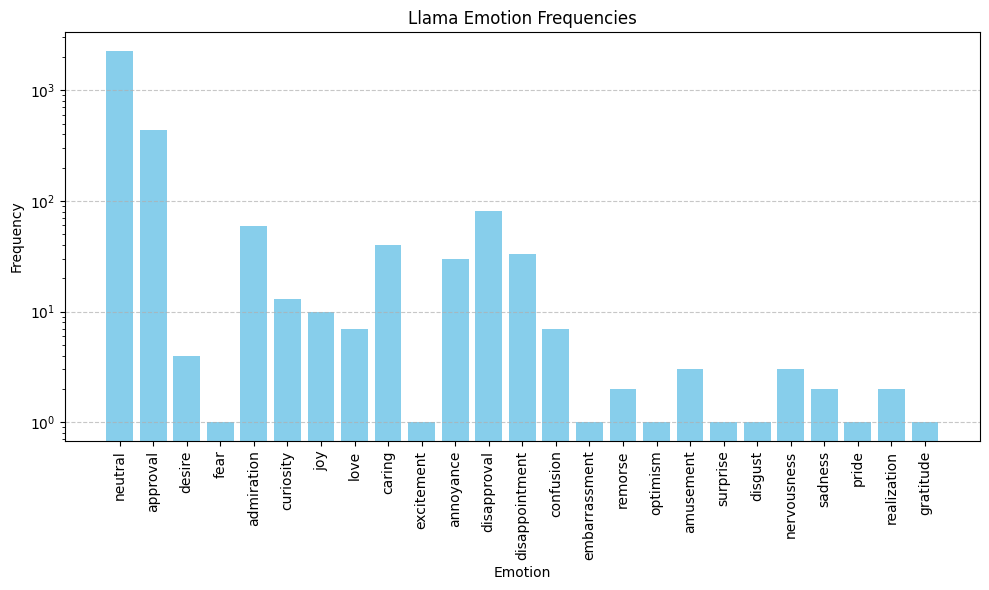

In [222]:
import matplotlib.pyplot as plt

# Extract emotion labels and corresponding frequencies from our final list
emotions = list(emotion_frequency_ll.keys())
frequencies = list(emotion_frequency_ll.values())

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(emotions, frequencies, color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Llama Emotion Frequencies')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent label clips
plt.tight_layout()
plt.show()

# Visualization of Zephyr Emotions

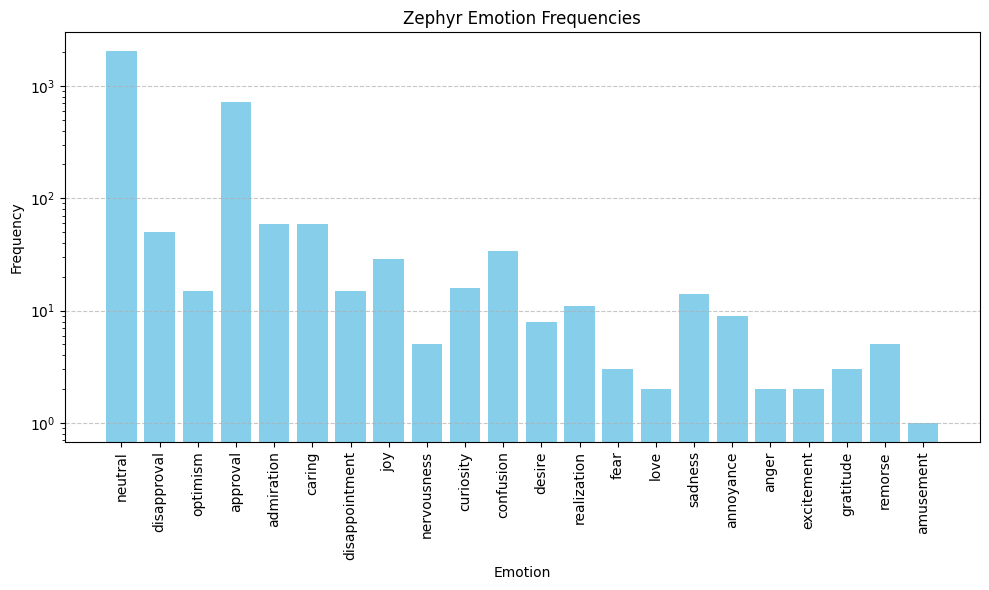

In [223]:
import matplotlib.pyplot as plt

# Extract emotion labels and corresponding frequencies from our final list
emotions = list(emotion_frequency_ze.keys())
frequencies = list(emotion_frequency_ze.values())

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(emotions, frequencies, color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Zephyr Emotion Frequencies')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout to prevent label clips
plt.tight_layout()
plt.show()

# Emotion Distribution Significance using Anova

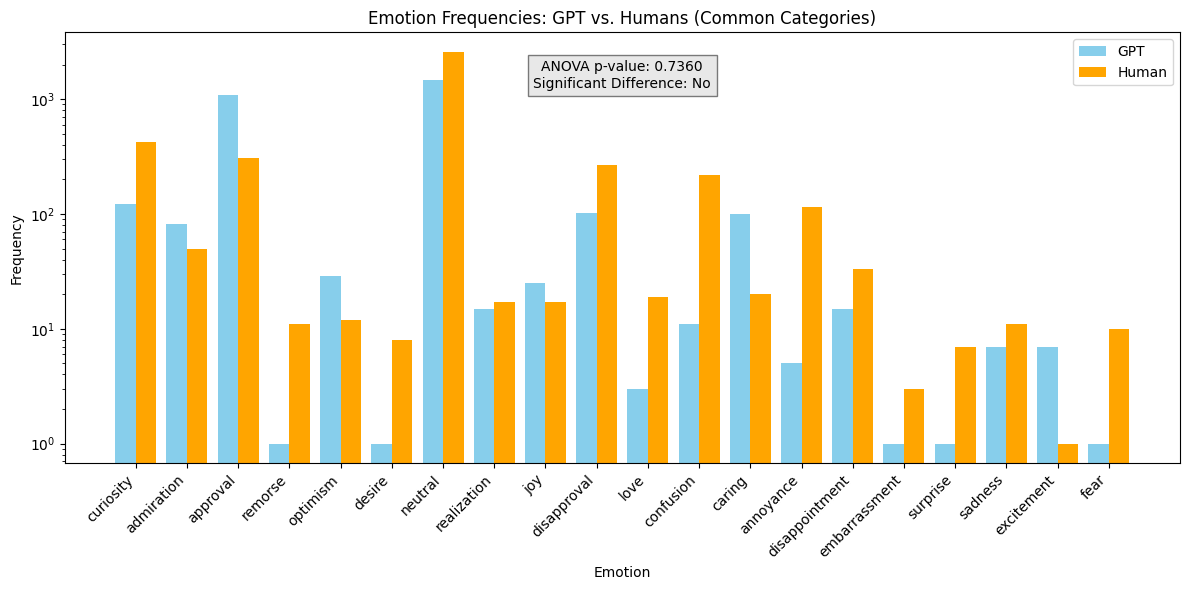

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


# Define emotion frequencies for GPT and humans
emotion_frequency_human = {
    'neutral': 2579,
    'approval': 305,
    'confusion': 218,
    'curiosity': 427,
    'annoyance': 116,
    'amusement': 51,
    'love': 19,
    'disapproval': 268,
    'disappointment': 33,
    'admiration': 50,
    'remorse': 11,
    'surprise': 7,
    'nervousness': 2,
    'optimism': 12,
    'realization': 17,
    'joy': 17,
    'anger': 11,
    'caring': 20,
    'desire': 8,
    'disgust': 7,
    'sadness': 11,
    'gratitude': 12,
    'embarrassment': 3,
    'fear': 10,
    'excitement': 1
}

emotion_frequency_gpt = {
    'caring': 100,
    'approval': 1081,
    'neutral': 1471,
    'sadness': 7,
    'admiration': 82,
    'disapproval': 102,
    'curiosity': 122,
    'excitement': 7,
    'optimism': 29,
    'disappointment': 15,
    'confusion': 11,
    'embarrassment': 1,
    'joy': 25,
    'surprise': 1,
    'realization': 15,
    'love': 3,
    'remorse': 1,
    'fear': 1,
    'annoyance': 5,
    'desire': 1
}

# Get unique emotion categories from both GPT and human dictionaries
emotions_gpt = set(emotion_frequency_gpt.keys())
emotions_human = set(emotion_frequency_human.keys())

# Find common emotion categories (intersection of keys)
common_emotions = emotions_gpt.intersection(emotions_human)

# Extract corresponding frequencies for common emotion categories
frequencies_gpt = [emotion_frequency_gpt[emotion] for emotion in common_emotions]
frequencies_human = [emotion_frequency_human[emotion] for emotion in common_emotions]

# Perform one-way ANOVA to test for significant differences in frequencies
f_statistic, p_value = f_oneway(frequencies_gpt, frequencies_human)

# Set significance level (e.g., alpha = 0.05)
alpha = 0.05
significance = 'Yes' if p_value < alpha else 'No'

# Create bar plot to visualize emotion frequencies for GPT and humans (common categories only)
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(common_emotions)) - 0.2, frequencies_gpt, width=0.4, label='GPT', align='center', color='skyblue')
plt.bar(np.arange(len(common_emotions)) + 0.2, frequencies_human, width=0.4, label='Human', align='center', color='orange')
plt.xticks(np.arange(len(common_emotions)), common_emotions, rotation=45, ha='right')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Emotion Frequencies: GPT vs. Humans (Common Categories)')
plt.legend()

# Add ANOVA test result to the plot
plt.text(0.5, 0.9, f'ANOVA p-value: {p_value:.4f}\nSignificant Difference: {significance}', transform=plt.gca().transAxes, fontsize=10, ha='center', va='center', bbox=dict(facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.show()


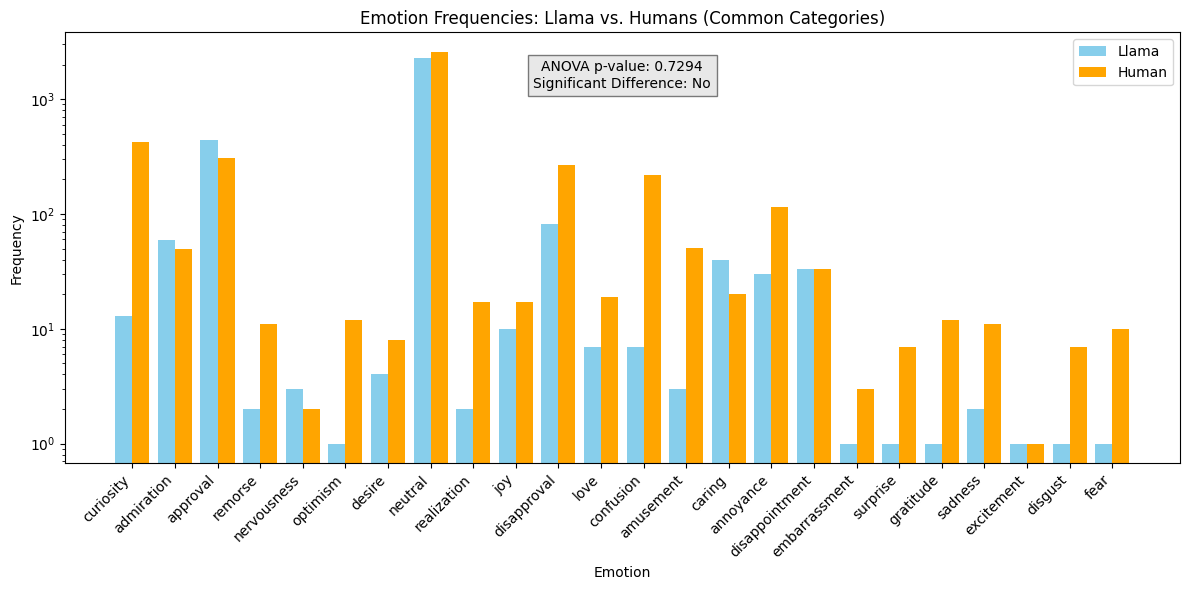

In [225]:
# Define emotion frequencies for Llama
emotion_frequency_ll = {
    'neutral': 2266,
    'approval': 440,
    'desire': 4,
    'fear': 1,
    'admiration': 59,
    'curiosity': 13,
    'joy': 10,
    'love': 7,
    'caring': 40,
    'excitement': 1,
    'annoyance': 30,
    'disapproval': 81,
    'disappointment': 33,
    'confusion': 7,
    'embarrassment': 1,
    'remorse': 2,
    'optimism': 1,
    'amusement': 3,
    'surprise': 1,
    'disgust': 1,
    'nervousness': 3,
    'sadness': 2,
    'pride': 1,
    'realization': 2,
    'gratitude': 1
}

# Get unique emotion categories from both Llanma and human dictionaries
emotions_ll = set(emotion_frequency_ll.keys())
emotions_human = set(emotion_frequency_human.keys())

# Find common emotion categories (intersection of keys)
common_emotions = emotions_ll.intersection(emotions_human)

# Extract corresponding frequencies for common emotion categories
frequencies_ll = [emotion_frequency_ll[emotion] for emotion in common_emotions]
frequencies_human = [emotion_frequency_human[emotion] for emotion in common_emotions]

# Perform one-way ANOVA to test for significant differences in frequencies
f_statistic, p_value = f_oneway(frequencies_ll, frequencies_human)

# Set significance level (e.g., alpha = 0.05)
alpha = 0.05
significance = 'Yes' if p_value < alpha else 'No'

# Create bar plot to visualize emotion frequencies for Llama and humans (common categories only)
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(common_emotions)) - 0.2, frequencies_ll, width=0.4, label='Llama', align='center', color='skyblue')
plt.bar(np.arange(len(common_emotions)) + 0.2, frequencies_human, width=0.4, label='Human', align='center', color='orange')
plt.xticks(np.arange(len(common_emotions)), common_emotions, rotation=45, ha='right')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Emotion Frequencies: Llama vs. Humans (Common Categories)')
plt.legend()

# Add ANOVA test result to the plot
plt.text(0.5, 0.9, f'ANOVA p-value: {p_value:.4f}\nSignificant Difference: {significance}', transform=plt.gca().transAxes, fontsize=10, ha='center', va='center', bbox=dict(facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.show()

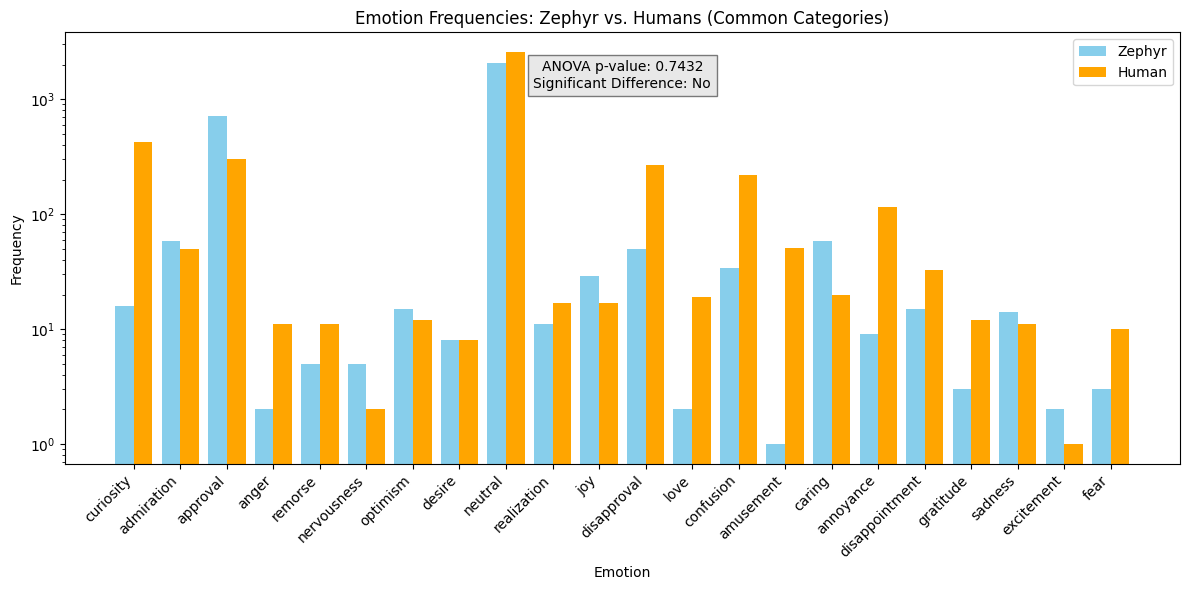

In [226]:
# Define emotion frequencies for Zephyr
emotion_frequency_ze = {
    'neutral': 2048,
    'disapproval': 50,
    'optimism': 15,
    'approval': 712,
    'admiration': 59,
    'caring': 59,
    'disappointment': 15,
    'joy': 29,
    'nervousness': 5,
    'curiosity': 16,
    'confusion': 34,
    'desire': 8,
    'realization': 11,
    'fear': 3,
    'love': 2,
    'sadness': 14,
    'annoyance': 9,
    'anger': 2,
    'excitement': 2,
    'gratitude': 3,
    'remorse': 5,
    'amusement': 1
}

# Get unique emotion categories from both Zephyr and human dictionaries
emotions_ze = set(emotion_frequency_ze.keys())
emotions_human = set(emotion_frequency_human.keys())

# Find common emotion categories (intersection of keys)
common_emotions = emotions_ze.intersection(emotions_human)

# Extract corresponding frequencies for common emotion categories
frequencies_ze = [emotion_frequency_ze[emotion] for emotion in common_emotions]
frequencies_human = [emotion_frequency_human[emotion] for emotion in common_emotions]

# Perform one-way ANOVA to test for significant differences in frequencies
f_statistic, p_value = f_oneway(frequencies_ze, frequencies_human)

# Set significance level (e.g., alpha = 0.05)
alpha = 0.05
significance = 'Yes' if p_value < alpha else 'No'

# Create bar plot to visualize emotion frequencies for Zephyr and humans (common categories only)
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(common_emotions)) - 0.2, frequencies_ze, width=0.4, label='Zephyr', align='center', color='skyblue')
plt.bar(np.arange(len(common_emotions)) + 0.2, frequencies_human, width=0.4, label='Human', align='center', color='orange')
plt.xticks(np.arange(len(common_emotions)), common_emotions, rotation=45, ha='right')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Emotion Frequencies: Zephyr vs. Humans (Common Categories)')
plt.legend()

# Add ANOVA test result to the plot
plt.text(0.5, 0.9, f'ANOVA p-value: {p_value:.4f}\nSignificant Difference: {significance}', transform=plt.gca().transAxes, fontsize=10, ha='center', va='center', bbox=dict(facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.show()

# Aggregating Emotions based on Post Sentiment

Post Sentiment is one of the following options {Positive/Neutral/Negative}

In [227]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

# Initialize the text classification pipeline for emotion analysis (Go emotions from Hugging Face)
# (see link above)
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=5)

# Define the mapping of emotions to sentiment categories
# From Go Emotions dataset (see link above)
emotion_sentiment_mapping = {
    'joy': 'positive',
    'optimism': 'positive',
    'amusement': 'positive',
    'love': 'positive',
    'excitement': 'positive',
    'admiration': 'positive',
    'relief': 'positive',
    'gratitude': 'positive',
    'pride': 'positive',
    'caring': 'positive',
    'approval': 'positive',
    'neutral': 'neutral',
    'surprise': 'neutral',
    'realization': 'neutral',
    'confusion': 'neutral',
    'curiosity': 'neutral',
    'disapproval': 'negative',
    'desire': 'negative',
    'remorse': 'negative',
    'disappointment': 'negative',
    'annoyance': 'negative',
    'nervousness': 'negative',
    'anger': 'negative',
    'fear': 'negative',
    'embarassment': 'negative',
    'sadness': 'negative',
    'grief': 'negative',
    'disgust': 'negative',
}

# Final Emotions and Distribution: (to save on 1 hour compute time):
sentiment_frequency_human = {
    'positive': 124,
    'negative': 140,
    'neutral': 580
}

emotion_frequency_human = {
    'positive': {
        'neutral': 336,
        'curiosity': 65,
        'disapproval': 43,
        'confusion': 26,
        'love': 6,
        'remorse': 4,
        'approval': 61,
        'annoyance': 20,
        'amusement': 6,
        'gratitude': 4,
        'realization': 3,
        'anger': 7,
        'admiration': 22,
        'caring': 1,
        'desire': 1,
        'fear': 1,
        'joy': 5,
        'disappointment': 6,
        'sadness': 2,
        'optimism': 1
    },
    'negative': {
        'neutral': 409,
        'approval': 51,
        'confusion': 35,
        'disappointment': 11,
        'amusement': 10,
        'curiosity': 77,
        'disapproval': 43,
        'remorse': 1,
        'joy': 2,
        'anger': 1,
        'desire': 5,
        'caring': 10,
        'sadness': 5,
        'annoyance': 22,
        'optimism': 2,
        'realization': 3,
        'admiration': 5,
        'gratitude': 3,
        'fear': 1,
        'love': 2,
        'nervousness': 1,
        'disgust': 1
    },
    'neutral': {
        'neutral': 1839,
        'approval': 193,
        'confusion': 157,
        'curiosity': 285,
        'annoyance': 74,
        'amusement': 35,
        'love': 11,
        'disapproval': 182,
        'admiration': 23,
        'surprise': 7,
        'nervousness': 1,
        'optimism': 9,
        'realization': 11,
        'disappointment': 16,
        'caring': 9,
        'disgust': 6,
        'anger': 3,
        'remorse': 6,
        'gratitude': 5,
        'joy': 10,
        'sadness': 4,
        'embarrassment': 3,
        'fear': 8,
        'desire': 2,
        'excitement': 1
    }
}

# # Initialize count var for batch logging progress
# count = 0

# # Create a dictionary to store sentiment frequencies
# sentiment_frequency = {'positive': 0, 'negative': 0, 'neutral': 0}

# # Create a dictionary to store emotion frequencies for each sentiment category
# emotion_frequency = {'positive': {}, 'negative': {}, 'neutral': {}}

def is_statistically_significant(sentiment_counts, sentiment_frequency):
    # Calculate the sum of observed frequencies (ie how many times did the emotion show up across all types of posts)
    observed_sum = sentiment_counts.sum()

    # Calculate the total number of posts
    total_posts = sum(sentiment_frequency.values())

    # Calculate expected proportions based on post distribution
    if total_posts > 0:
        expected_proportions = np.array([sentiment_frequency[key] / total_posts for key in sentiment_frequency.keys()])
        expected_counts = expected_proportions * observed_sum

    # Perform chi-squared test
    chi2_stat, p_val = chisquare(sentiment_counts, f_exp=expected_counts)

    # Determine if the test is statistically significant based on the p-value
    if p_val < 0.05:  # You can adjust the significance level (alpha) as needed
        print(f"Expected counts would have been: {expected_counts}")
        sig_expected_counts.append(expected_counts)
        print(f"Actual counts were: {sentiment_counts}")
        sig_actual_counts.append(sentiment_counts)
        return True, chi2_stat, p_val
    else:
        return False, chi2_stat, p_val

# # Iterate over each row in the DataFrame
# for index, row in cmv_df.iterrows():
#     # Log Progress every 200 batches
#     if count % 100 == 0:
#       print(f"Number of posts analyzed: {count}")
#       print(" Post Sentiment Distribution")
#       print(sentiment_frequency)
#       print("")

#       print(" Comment Emotion Distribution for Posts")
#       print(emotion_frequency)
#       print("")

#     # Process the post body for sentiment analysis
#     post_body = str(row['Body'])

#     # Truncate post_body if it exceeds 512 characters
#     post_body = post_body[:512]

#     if post_body:
#         # Analyze emotions of the post body
#         emotions = classifier(post_body)

#         # Make sure we have emotions for the post
#         if emotions and len(emotions) > 0:
#             # Grab the top emotion for the post body
#             top_emotion_post = emotions[0][0]['label']
#             if top_emotion_post in emotion_sentiment_mapping:
#                 # Convert that top emotion into a sentiment (positive/neutral/negative)
#                 # for later analysis
#                 post_sentiment = emotion_sentiment_mapping[top_emotion_post]

#                 # Update sentiment frequency of posts
#                 sentiment_frequency[post_sentiment] += 1

#         # Create our batch comments
#         batch_comments = []
#         for i in range(1, 6):
#             comment_key = f'Comment {i}'
#             # Truncate comments to first 512 characters
#             row[comment_key] = str(row[comment_key])[:512]
#             if isinstance(row[comment_key], str):
#                 batch_comments.append(row[comment_key])

#         # Process the comments for emotion analysis (using top 5 comments)
#         if batch_comments:
#             for comment in batch_comments:
#                 # Grab the emotion with the highest probability rating
#                 top_emotion_comment = classifier(comment)[0][0]['label']
#                 if top_emotion_comment not in emotion_frequency[post_sentiment]:
#                     # If the emotion does not exist, set freq to be 1 for the emotion
#                     emotion_frequency[post_sentiment][top_emotion_comment] = 1
#                 else:
#                     # Otherwise increment the current count for the emotion
#                     emotion_frequency[post_sentiment][top_emotion_comment] += 1

#         # increment our overall count that does batch logging
#         count += 1

# Define the sentiment categories in the desired order
sentiment_categories = ['positive', 'negative', 'neutral']

# Define the complete list of emotions from the mapping
all_emotions = list(emotion_sentiment_mapping.keys())

# Initialize the contingency table with zeros
contingency_table = np.zeros((len(sentiment_categories), len(all_emotions)), dtype=int)

# Populate the contingency table with emotion frequencies
for i, sentiment in enumerate(sentiment_categories):
    for j, emotion in enumerate(all_emotions):
        if emotion in emotion_frequency_human[sentiment]:
            contingency_table[i, j] = emotion_frequency_human[sentiment][emotion]

# Emotion of interest (column index)
emotion_index = 0
significance_results = []
sig_expected_counts = []
sig_actual_counts = []
p_value_results = []

# Extract all sentiment values for the specified emotion (column)
for emotion in emotion_sentiment_mapping:
  # print(emotion_index)
  # print(emotion)
  sentiment_counts = contingency_table[:, emotion_index]
  # print(sentiment_counts)

  if np.all(sentiment_counts >= 1):
      is_significant, chi2_stat, p_val = is_statistically_significant(sentiment_counts, sentiment_frequency_human)

      print(f"Is the difference statistically significant? for emotion : {emotion}")
      if is_significant:
        print("Yes, it was significant")
        significance_results.append(emotion)
        p_value_results.append(p_val)
      else:
        print("No, it was not significant")
  else:
      print(f"Not enough information to perform the chi-squared test for emotion: {emotion}")

  emotion_index += 1

# print("Final Post Sentiment Distribution")
# print(sentiment_frequency)
# print("")

# print("Final Comment Emotion Distribution for Posts")
# print(emotion_frequency)
# print("")


# Final Post Sentiment Distribution
# {'positive': 124, 'negative': 140, 'neutral': 580}

# Final Comment Emotion Distribution for Posts
# {'positive': {'neutral': 336, 'curiosity': 65, 'disapproval': 43, 'confusion': 26, 'love': 6, 'remorse': 4, 'approval': 61, 'annoyance': 20, 'amusement': 6, 'gratitude': 4, 'realization': 3, 'anger': 7, 'admiration': 22, 'caring': 1, 'desire': 1, 'fear': 1, 'joy': 5, 'disappointment': 6, 'sadness': 2, 'optimism': 1}, 'negative': {'neutral': 409, 'approval': 51, 'confusion': 35, 'disappointment': 11, 'amusement': 10, 'curiosity': 77, 'disapproval': 43, 'remorse': 1, 'joy': 2, 'anger': 1, 'desire': 5, 'caring': 10, 'sadness': 5, 'annoyance': 22, 'optimism': 2, 'realization': 3, 'admiration': 5, 'gratitude': 3, 'fear': 1, 'love': 2, 'nervousness': 1, 'disgust': 1}, 'neutral': {'neutral': 1839, 'approval': 193, 'confusion': 157, 'curiosity': 285, 'annoyance': 74, 'amusement': 35, 'love': 11, 'disapproval': 182, 'admiration': 23, 'surprise': 7, 'nervousness': 1, 'optimism': 9, 'realization': 11, 'disappointment': 16, 'caring': 9, 'disgust': 6, 'anger': 3, 'remorse': 6, 'gratitude': 5, 'joy': 10, 'sadness': 4, 'embarrassment': 3, 'fear': 8, 'desire': 2, 'excitement': 1}}



Is the difference statistically significant? for emotion : joy
No, it was not significant
Is the difference statistically significant? for emotion : optimism
No, it was not significant
Is the difference statistically significant? for emotion : amusement
No, it was not significant
Is the difference statistically significant? for emotion : love
No, it was not significant
Not enough information to perform the chi-squared test for emotion: excitement
Expected counts would have been: [ 7.34597156  8.29383886 34.36018957]
Actual counts were: [22  5 23]
Is the difference statistically significant? for emotion : admiration
Yes, it was significant
Not enough information to perform the chi-squared test for emotion: relief
Is the difference statistically significant? for emotion : gratitude
No, it was not significant
Not enough information to perform the chi-squared test for emotion: pride
Expected counts would have been: [ 2.93838863  3.31753555 13.74407583]
Actual counts were: [ 1 10  9]
Is the

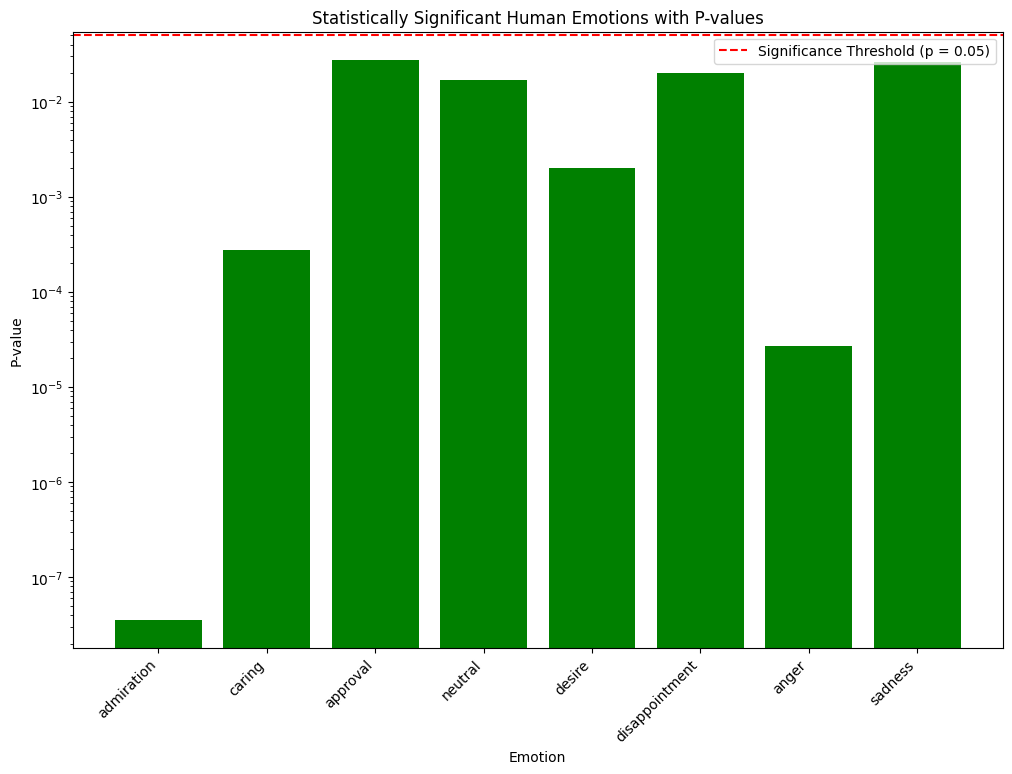

In [228]:
# Plotting results
import matplotlib.pyplot as plt
# Plotting results for significantly significant emotions
plt.figure(figsize=(12, 8))
plt.bar(significance_results, p_value_results, color='green')
plt.title('Statistically Significant Human Emotions with P-values')
plt.xlabel('Emotion')
plt.ylabel('P-value')
plt.yscale('log')  # Use logarithmic scale for better visualization of p-values
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels for better readability
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (p = 0.05)')  # Add significance threshold line
plt.legend()
plt.show()

[ 14.65402844  -3.29383886 -11.36018957  -1.93838863   6.68246445
  -4.74407583  16.18957346   0.40758294 -16.5971564  -43.63981043
 -19.62559242  63.26540284  -0.17535545   3.67298578  -3.49763033
   1.15165877   5.52606635  -6.67772512   5.38388626  -0.82464455
  -4.55924171   0.38388626   3.17535545  -3.55924171]


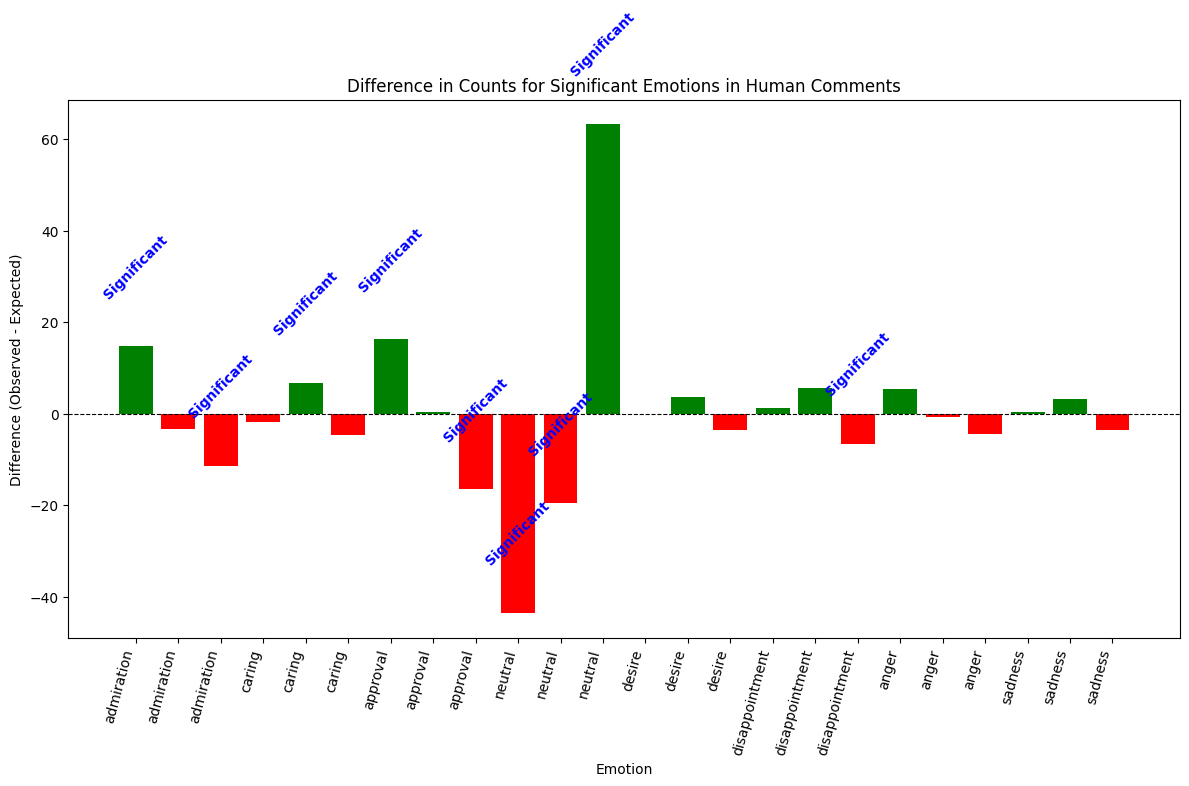

In [229]:

num_sentiments = 3
# Calculate the difference between observed and expected counts
difference = np.array(sig_actual_counts) - np.array(sig_expected_counts)

# Flatten the difference array to a 1D array
difference_flat = difference.flatten()
print(difference_flat)

# Define sentiments and corresponding indices for bar plotting
sentiments = ['Positive', 'Negative', 'Neutral']
indices = np.arange(len(significance_results) * len(sentiments))  # Indices for x-axis positions

# Define colors based on the sign of the difference
bar_colors = np.where(difference_flat > 0, 'green', 'red')

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(indices, difference_flat, color=bar_colors)

# Add labels, title, and legend
plt.xlabel('Emotion')
plt.ylabel('Difference (Observed - Expected)')
plt.title('Difference in Counts for Significant Emotions in Human Comments')
# plt.xticks(indices, np.tile(significance_results, len(sentiments)), rotation=45, ha='right')  # Set x-axis labels
emotions_repeated = np.repeat(significance_results, num_sentiments)
plt.xticks(indices, emotions_repeated, rotation=75, ha='right')  # Set x-axis labels
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add horizontal line at y=0

# Add annotations for significant differences
for i, bar, diff in zip(indices, bars, difference_flat):
    if np.abs(diff) > 0.05 * np.mean(sig_expected_counts):
        plt.text(i, bar.get_height() + 10, 'Significant', ha='center', va='bottom', color='blue', weight='bold', rotation=45,)

plt.tight_layout()
plt.show()


# Overall Post Sentiment Distribution

Positive / Neutral / Negative

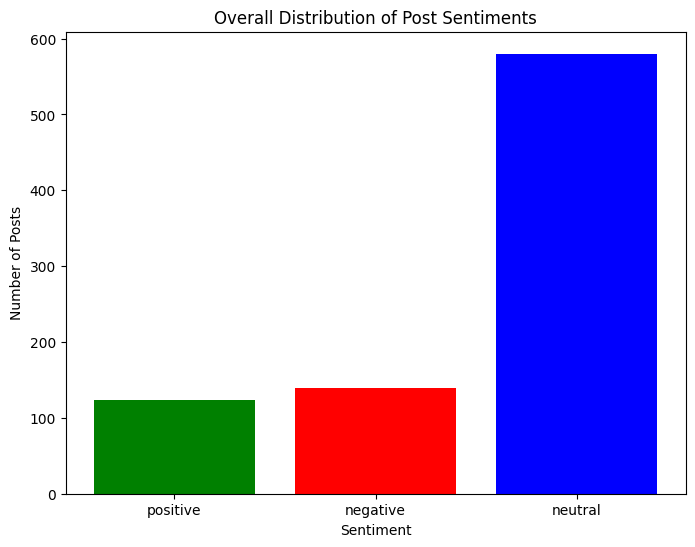

In [230]:
# Data for the overall distribution of post sentiments
sentiments = list(sentiment_frequency_human.keys())
counts = list(sentiment_frequency_human.values())

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiments, counts, color=['green', 'red', 'blue'])
plt.title('Overall Distribution of Post Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()


# Respective Emotion Distribution for Post Sentiment

28 Unique Emotions (Go Emotions) - See Motivation Above

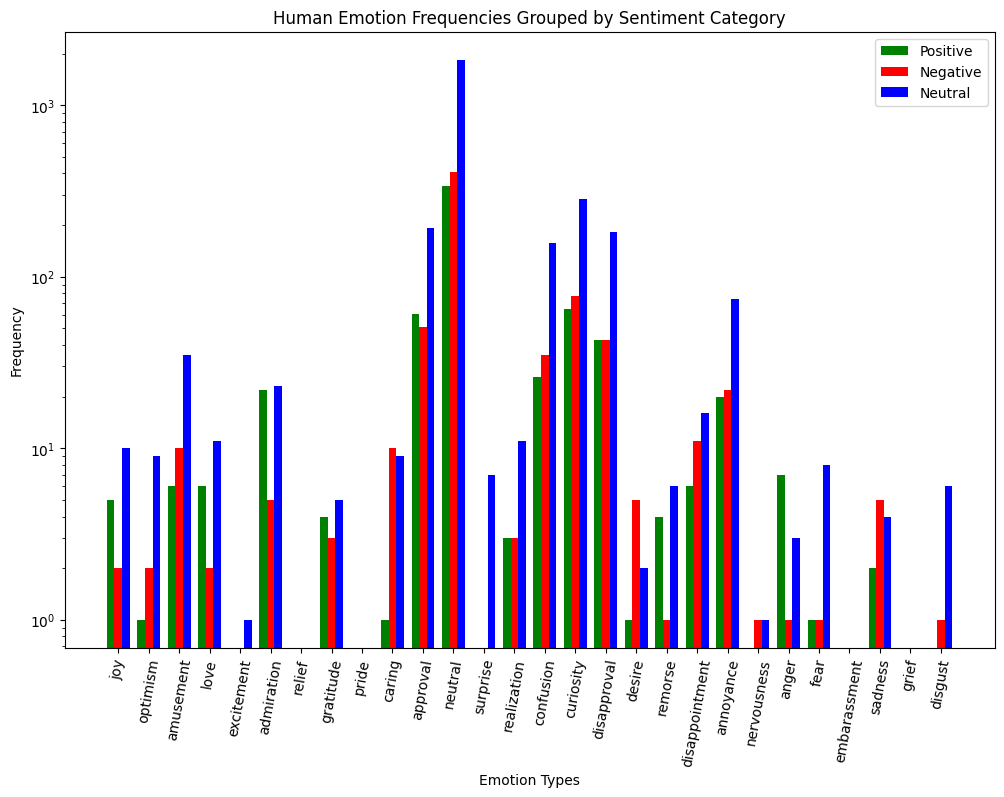

In [231]:
# Data for emotion frequencies across different sentiment categories
sentiments = list(sentiment_frequency_human.keys())
emotion_types = list(emotion_sentiment_mapping.keys())
num_emotions = len(emotion_types)

# Prepare data for the grouped bar chart
positive_emotions = [emotion_frequency_human['positive'].get(emotion, 0) for emotion in emotion_types]
negative_emotions = [emotion_frequency_human['negative'].get(emotion, 0) for emotion in emotion_types]
neutral_emotions = [emotion_frequency_human['neutral'].get(emotion, 0) for emotion in emotion_types]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bars
bar_width = 0.25
index = np.arange(num_emotions)

# Plotting the grouped bar chart
bar1 = ax.bar(index - bar_width, positive_emotions, bar_width, label='Positive', color='green')
bar2 = ax.bar(index, negative_emotions, bar_width, label='Negative', color='red')
bar3 = ax.bar(index + bar_width, neutral_emotions, bar_width, label='Neutral', color='blue')

# Add labels, title, and legend
ax.set_xlabel('Emotion Types')
ax.set_ylabel('Frequency')
plt.yscale('log')  # Set y-axis scale to logarithmic
ax.set_title('Human Emotion Frequencies Grouped by Sentiment Category')
ax.set_xticks(index)
ax.set_xticklabels(emotion_types, rotation=80)

# Add a legend for sentiment categories
ax.legend(['Positive', 'Negative', 'Neutral'])

# Show the plot
plt.show()


**Positive Reddit Posts Human Emotion Distribution**

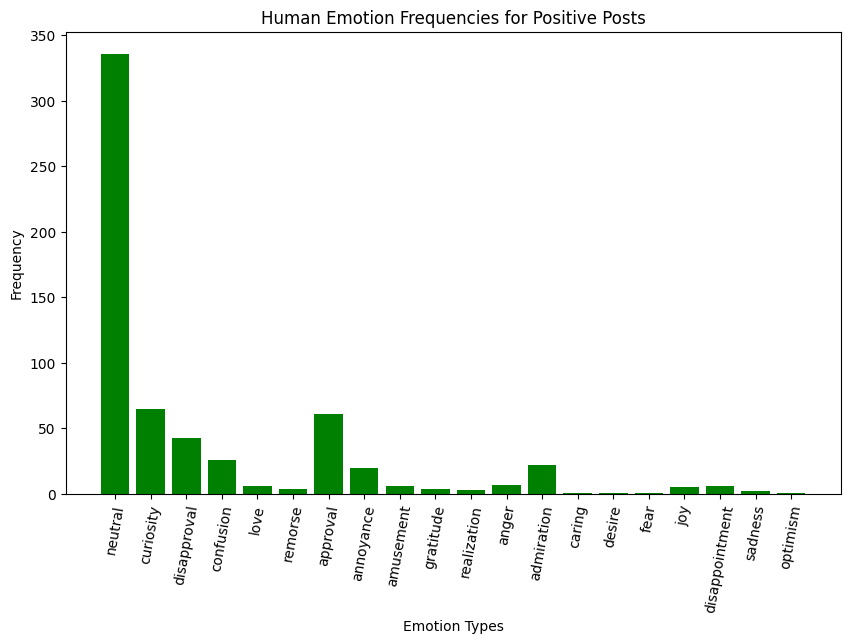

In [232]:
import matplotlib.pyplot as plt

# Data for positive sentiment emotions
positive_emotions = emotion_frequency_human['positive']

# Plotting the bar chart for positive sentiment emotions
plt.figure(figsize=(10, 6))
plt.bar(positive_emotions.keys(), positive_emotions.values(), color='green')
plt.title('Human Emotion Frequencies for Positive Posts')
plt.xlabel('Emotion Types')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.show()


**Neutral Reddit Posts Human Emotion Distribution**

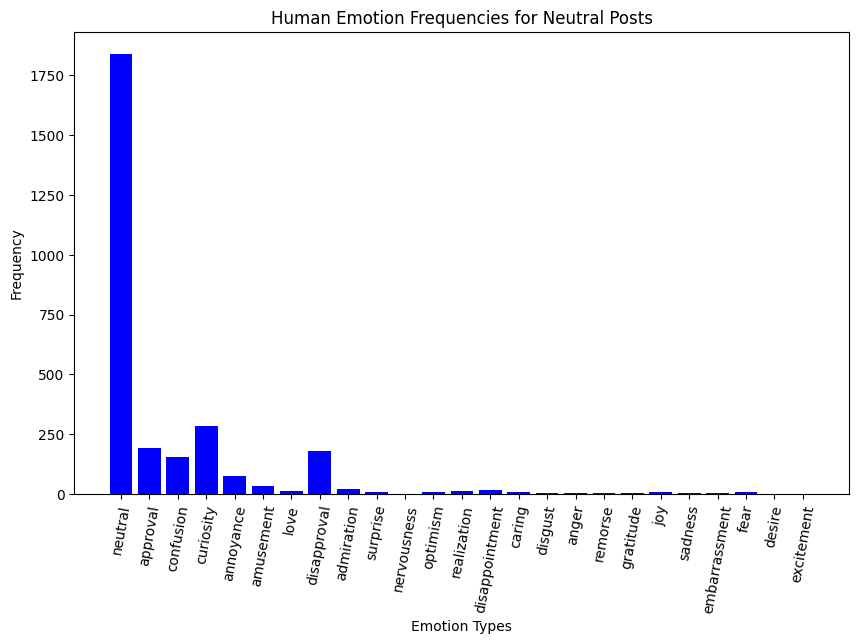

In [233]:
import matplotlib.pyplot as plt

# Data for neutral sentiment emotions
neutral_emotions = emotion_frequency_human['neutral']

# Plotting the bar chart for neutral sentiment emotions
plt.figure(figsize=(10, 6))
plt.bar(neutral_emotions.keys(), neutral_emotions.values(), color='blue')
plt.title('Human Emotion Frequencies for Neutral Posts')
plt.xlabel('Emotion Types')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.show()


**Negative Reddit Posts Human Emotion Distribution**

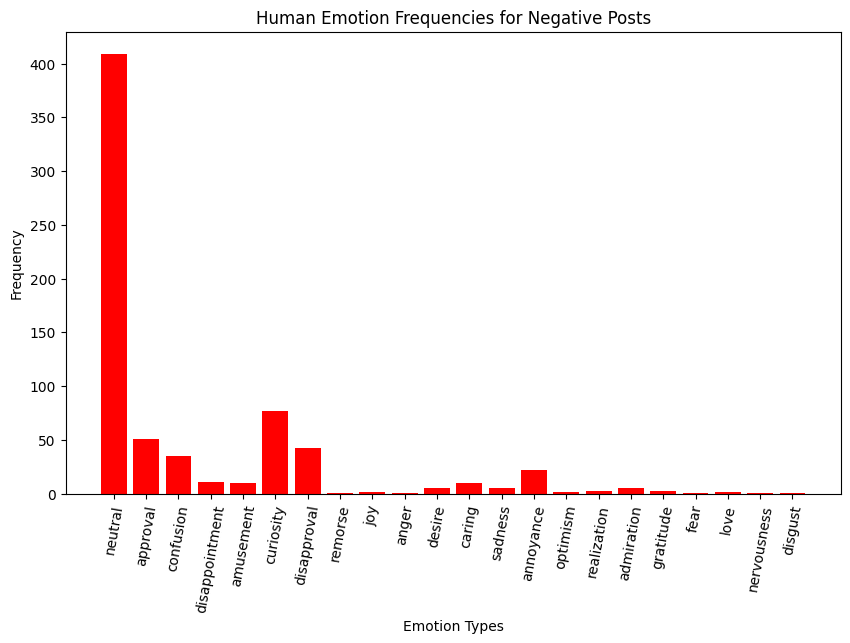

In [234]:
import matplotlib.pyplot as plt

# Data for negative sentiment emotions
negative_emotions = emotion_frequency_human['negative']

# Plotting the bar chart for negative sentiment emotions
plt.figure(figsize=(10, 6))
plt.bar(negative_emotions.keys(), negative_emotions.values(), color='red')
plt.title('Human Emotion Frequencies for Negative Posts')
plt.xlabel('Emotion Types')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.show()


# LLM Emotion Distribution as a Function of Post Sentiment

GPT

In [235]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

# Initialize the text classification pipeline for emotion analysis (Go emotions from Hugging Face)
# (see link above)
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=5)

# Define the mapping of emotions to sentiment categories
# From Go Emotions dataset (see link above)
emotion_sentiment_mapping = {
    'joy': 'positive',
    'optimism': 'positive',
    'amusement': 'positive',
    'love': 'positive',
    'excitement': 'positive',
    'admiration': 'positive',
    'relief': 'positive',
    'gratitude': 'positive',
    'pride': 'positive',
    'caring': 'positive',
    'approval': 'positive',
    'neutral': 'neutral',
    'surprise': 'neutral',
    'realization': 'neutral',
    'confusion': 'neutral',
    'curiosity': 'neutral',
    'disapproval': 'negative',
    'desire': 'negative',
    'remorse': 'negative',
    'disappointment': 'negative',
    'annoyance': 'negative',
    'nervousness': 'negative',
    'anger': 'negative',
    'fear': 'negative',
    'embarassment': 'negative',
    'sadness': 'negative',
    'grief': 'negative',
    'disgust': 'negative',
}

# # Initialize count var for batch logging progress
# count = 0

# # Create a dictionary to store sentiment frequencies
# sentiment_frequency = {'positive': 0, 'negative': 0, 'neutral': 0}

# # Create a dictionary to store emotion frequencies for each sentiment category
# emotion_frequency = {'positive': {}, 'negative': {}, 'neutral': {}}

# Final GPT Emotion Frequencies: (to save on 1 hour compute time)
sentiment_frequency_gpt = {
    'positive': 91,
    'negative': 93,
    'neutral': 432
}

emotion_frequency_gpt = {
    'positive': {
        'approval': 185,
        'neutral': 178,
        'excitement': 1,
        'admiration': 25,
        'curiosity': 26,
        'disappointment': 3,
        'disapproval': 8,
        'optimism': 5,
        'caring': 18,
        'confusion': 1,
        'joy': 2,
        'realization': 2,
        'sadness': 1
    },
    'negative': {
        'neutral': 233,
        'admiration': 7,
        'approval': 135,
        'curiosity': 27,
        'caring': 24,
        'disappointment': 5,
        'confusion': 2,
        'embarrassment': 1,
        'disapproval': 14,
        'joy': 5,
        'sadness': 3,
        'optimism': 3,
        'excitement': 3,
        'annoyance': 1,
        'realization': 1,
        'love': 1
    },
    'neutral': {
        'caring': 58,
        'approval': 761,
        'neutral': 1060,
        'sadness': 3,
        'admiration': 50,
        'disapproval': 80,
        'curiosity': 69,
        'optimism': 21,
        'disappointment': 7,
        'confusion': 8,
        'joy': 18,
        'surprise': 1,
        'realization': 12,
        'love': 2,
        'remorse': 1,
        'fear': 1,
        'annoyance': 4,
        'excitement': 3,
        'desire': 1
    }
}



def is_statistically_significant(sentiment_counts, sentiment_frequency):
    # Calculate the sum of observed frequencies (ie how many times did the emotion show up across all types of posts)
    observed_sum = sentiment_counts.sum()

    # Calculate the total number of posts
    total_posts = sum(sentiment_frequency.values())

    # Calculate expected proportions based on post distribution
    if total_posts > 0:
        expected_proportions = np.array([sentiment_frequency[key] / total_posts for key in sentiment_frequency.keys()])
        expected_counts = expected_proportions * observed_sum

        # print(f"Expected counts would have been: {expected_counts}")
        # print(f"Actual counts were: {sentiment_counts}")

    # Perform chi-squared test
    chi2_stat, p_val = chisquare(sentiment_counts, f_exp=expected_counts)

    # Determine if the test is statistically significant based on the p-value
    if p_val < 0.05:  # You can adjust the significance level (alpha) as needed
        print(f"Expected counts would have been: {expected_counts}")
        sig_expected_counts.append(expected_counts)
        print(f"Actual counts were: {sentiment_counts}")
        sig_actual_counts.append(sentiment_counts)
        return True, chi2_stat, p_val
    else:
        return False, chi2_stat, p_val

# # Iterate over each row in the DataFrame
# for index, row in df_gpt.iterrows():
#     # Log Progress every 200 batches
#     # print(count)
#     # if (count / 5) > 199:
#     #     break;
#     if (count / 5) % 25 == 0:
#       print(f"Number of Posts analyzed: {int(count / 5)}")
#       print(" Post Sentiment Distribution")
#       print(sentiment_frequency)
#       print("")

#     #   print(" Comment Emotion Distribution for Posts")
#     #   print(emotion_frequency)
#     #   print("")

#     # Process the post body for sentiment analysis
#     post_body = str(row['Query'])

#     # Truncate post_body if it exceeds 512 characters
#     post_body = post_body[:512]

#     if post_body:
#         # print(post_body)
#         # print("")
#         # Analyze emotions of the post body
#         emotions = classifier(post_body)

#         # Make sure we have emotions for the post
#         if emotions and len(emotions) > 0 and count % 5 == 0:
#             # print(post_body)
#             # Grab the top emotion for the post body
#             top_emotion_post = emotions[0][0]['label']
#             # print("")
#             # print(top_emotion_post)
#             # print("")

#             # print(top_emotion_post)
#             # print("")
#             # print("")
#             if top_emotion_post in emotion_sentiment_mapping:
#                 # Convert that top emotion into a sentiment (positive/neutral/negative)
#                 # for later analysis
#                 post_sentiment = emotion_sentiment_mapping[top_emotion_post]

#                 # Update sentiment frequency of posts
#                 sentiment_frequency[post_sentiment] += 1
#             # print(sentiment_frequency)

#         response = row[f'Response']
#         if isinstance(response, str):
#             response = response[:512]
#             # print(response)

#             output = classifier(response)
#             # print(output)
#             # Grab emotion labels for each output
#             top_emotion_comment = output[0][0]['label']
#             # Update emotion frequency dictionary
#             if top_emotion_comment not in emotion_frequency[post_sentiment]:
#                 # If the emotion does not exist, set freq to be 1 for the emotion
#                 emotion_frequency[post_sentiment][top_emotion_comment] = 1
#             else:
#                 # Otherwise increment the current count for the emotion
#                 emotion_frequency[post_sentiment][top_emotion_comment] += 1

#         # increment our overall count that does batch logging
#         count += 1

# Define the sentiment categories in the desired order
sentiment_categories = ['positive', 'negative', 'neutral']

# Define the complete list of emotions from the mapping
all_emotions = list(emotion_sentiment_mapping.keys())

# Initialize the contingency table with zeros
contingency_table = np.zeros((len(sentiment_categories), len(all_emotions)), dtype=int)

# Populate the contingency table with emotion frequencies
for i, sentiment in enumerate(sentiment_categories):
    for j, emotion in enumerate(all_emotions):
        if emotion in emotion_frequency_gpt[sentiment]:
            contingency_table[i, j] = emotion_frequency_gpt[sentiment][emotion]

# Emotion of interest (column index)
emotion_index = 0
significance_results = []
sig_expected_counts = []
sig_actual_counts = []
p_value_results = []

# Extract all sentiment values for the specified emotion (column)
for emotion in emotion_sentiment_mapping:
  # print(emotion_index)
  # print(emotion)
  sentiment_counts = contingency_table[:, emotion_index]
  # print(sentiment_counts)

  if np.all(sentiment_counts >= 1):
      is_significant, chi2_stat, p_val = is_statistically_significant(sentiment_counts, sentiment_frequency_gpt)

      print(f"Is the difference statistically significant? for emotion : {emotion}")
      if is_significant:
        print("Yes, it was significant")
        significance_results.append(emotion)
        p_value_results.append(p_val)
      else:
        print("No, it was not significant")
  else:
      print(f"Not enough information to perform the chi-squared test for emotion: {emotion}")

  emotion_index += 1

print("Final Post Sentiment Distribution")
print(sentiment_frequency_gpt)
print("")

print("Final Comment Emotion Distribution for Posts")
print(emotion_frequency_gpt)
print("")

Is the difference statistically significant? for emotion : joy
No, it was not significant
Is the difference statistically significant? for emotion : optimism
No, it was not significant
Not enough information to perform the chi-squared test for emotion: amusement
Not enough information to perform the chi-squared test for emotion: love
Is the difference statistically significant? for emotion : excitement
No, it was not significant
Expected counts would have been: [12.11363636 12.37987013 57.50649351]
Actual counts were: [25  7 50]
Is the difference statistically significant? for emotion : admiration
Yes, it was significant
Not enough information to perform the chi-squared test for emotion: relief
Not enough information to perform the chi-squared test for emotion: gratitude
Not enough information to perform the chi-squared test for emotion: pride
Expected counts would have been: [14.77272727 15.0974026  70.12987013]
Actual counts were: [18 24 58]
Is the difference statistically significan

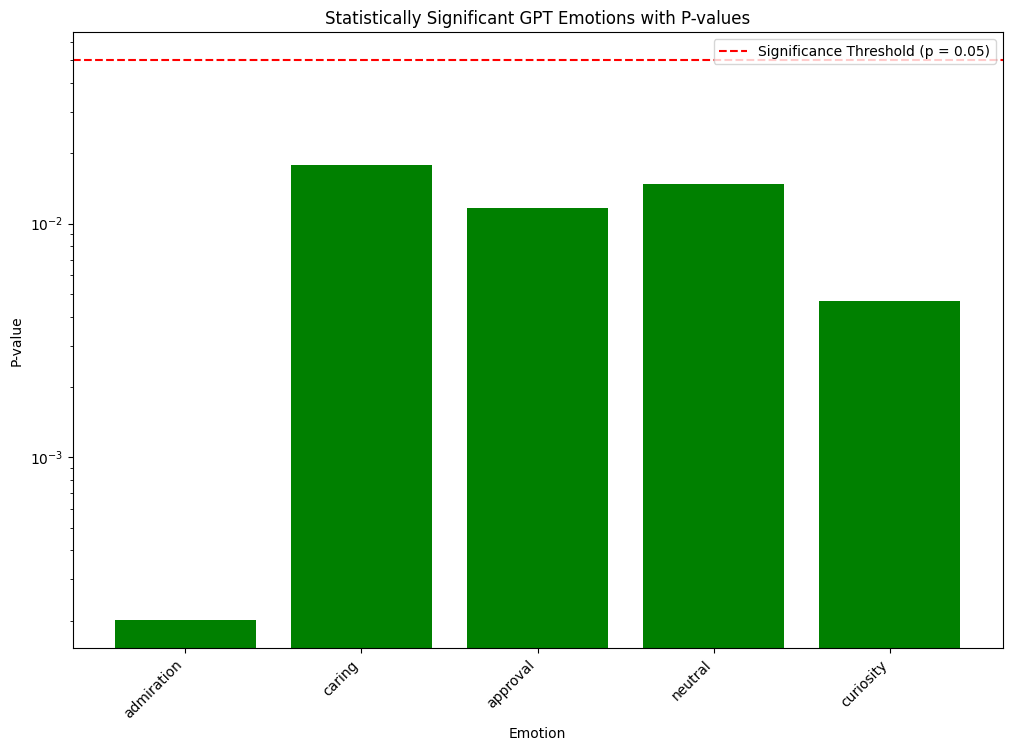

In [236]:
plt.figure(figsize=(12, 8))
plt.bar(significance_results, p_value_results, color='green')
plt.title('Statistically Significant GPT Emotions with P-values')
plt.xlabel('Emotion')
plt.ylabel('P-value')
plt.yscale('log')  # Use logarithmic scale for better visualization of p-values
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels for better readability
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (p = 0.05)')  # Add significance threshold line
plt.legend()
plt.show()

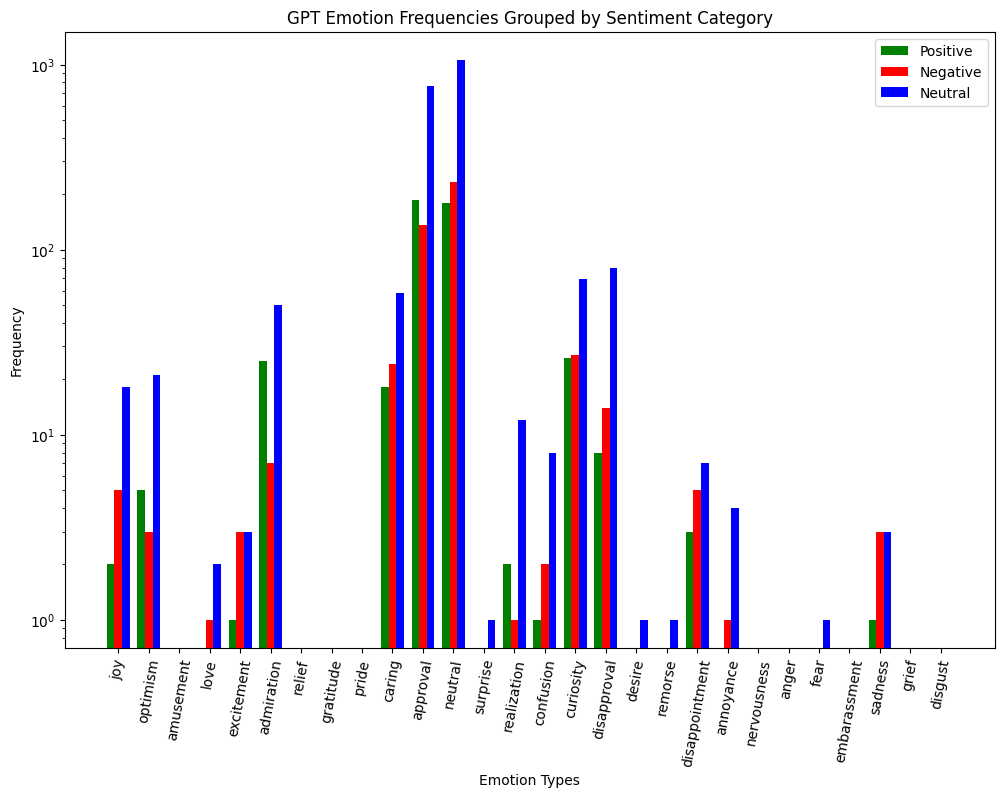

In [237]:
# Data for emotion frequencies across different sentiment categories
sentiments = list(sentiment_frequency_gpt.keys())
emotion_types = list(emotion_sentiment_mapping.keys())
num_emotions = len(emotion_types)

# Prepare data for the grouped bar chart
positive_emotions = [emotion_frequency_gpt['positive'].get(emotion, 0) for emotion in emotion_types]
negative_emotions = [emotion_frequency_gpt['negative'].get(emotion, 0) for emotion in emotion_types]
neutral_emotions = [emotion_frequency_gpt['neutral'].get(emotion, 0) for emotion in emotion_types]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bars
bar_width = 0.25
index = np.arange(num_emotions)

# Plotting the grouped bar chart
bar1 = ax.bar(index - bar_width, positive_emotions, bar_width, label='Positive', color='green')
bar2 = ax.bar(index, negative_emotions, bar_width, label='Negative', color='red')
bar3 = ax.bar(index + bar_width, neutral_emotions, bar_width, label='Neutral', color='blue')

# Add labels, title, and legend
ax.set_xlabel('Emotion Types')
ax.set_ylabel('Frequency')
plt.yscale('log')  # Set y-axis scale to logarithmic
ax.set_title('GPT Emotion Frequencies Grouped by Sentiment Category')
ax.set_xticks(index)
ax.set_xticklabels(emotion_types, rotation=80)

# Add a legend for sentiment categories
ax.legend(['Positive', 'Negative', 'Neutral'])

# Show the plot
plt.show()


[ 12.88636364  -5.37987013  -7.50649351   3.22727273   8.9025974
 -12.12987013  25.30681818 -28.20292208   2.8961039  -39.30681818
  10.91720779  28.38961039   7.97727273   8.58116883 -16.55844156]


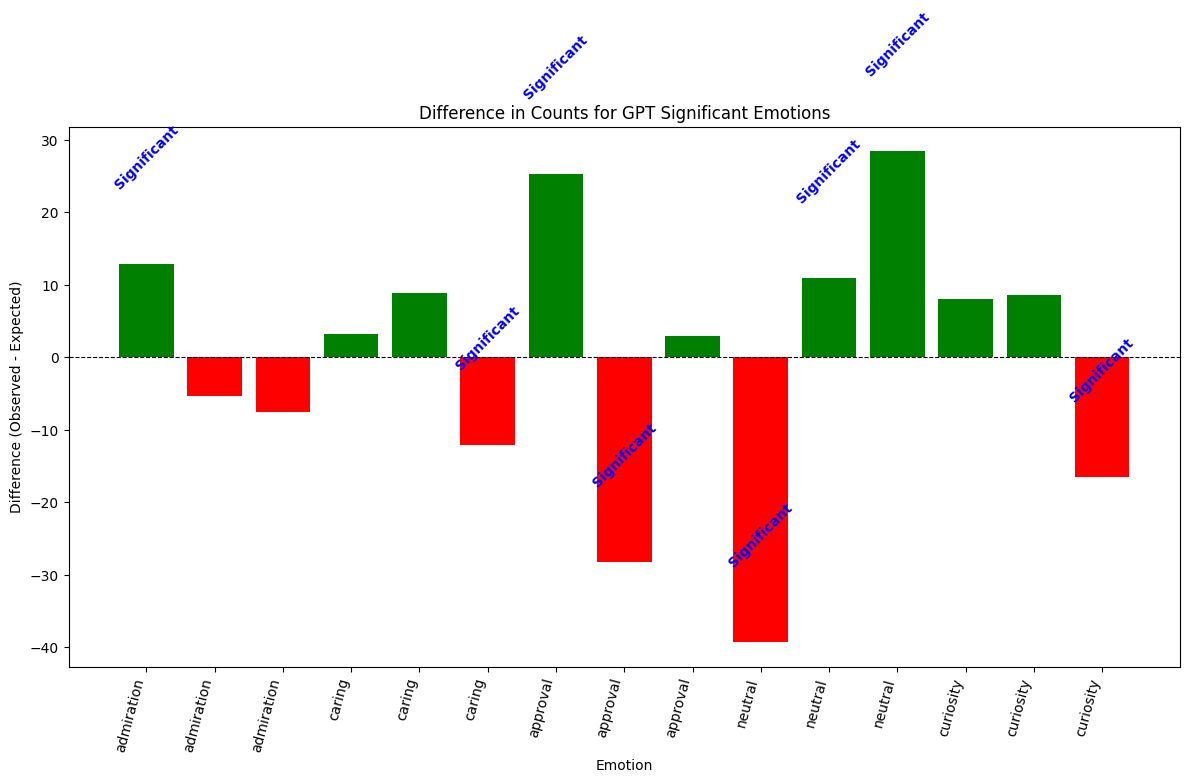

In [238]:
import matplotlib.pyplot as plt

# Calculate the difference between observed and expected counts
difference = np.array(sig_actual_counts) - np.array(sig_expected_counts)

# Flatten the difference array to a 1D array
difference_flat = difference.flatten()
print(difference_flat)

# Define sentiments and corresponding indices for bar plotting
sentiments = ['Positive', 'Negative', 'Neutral']
indices = np.arange(len(significance_results) * len(sentiments))  # Indices for x-axis positions

# Define colors based on the sign of the difference
bar_colors = np.where(difference_flat > 0, 'green', 'red')

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(indices, difference_flat, color=bar_colors)

# Add labels, title, and legend
plt.xlabel('Emotion')
plt.ylabel('Difference (Observed - Expected)')
plt.title('Difference in Counts for GPT Significant Emotions')
emotions_repeated = np.repeat(significance_results, 3)
# plt.xticks(indices, np.tile(significance_results, len(sentiments)), rotation=45, ha='right')  # Set x-axis labels
plt.xticks(indices, emotions_repeated, rotation=75, ha='right')  # Set x-axis labels
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add horizontal line at y=0

# Add annotations for significant differences
for i, bar, diff in zip(indices, bars, difference_flat):
    if np.abs(diff) > 0.05 * np.mean(sig_expected_counts):
        plt.text(i, bar.get_height() + 10, 'Significant', ha='center', va='bottom', color='blue', weight='bold', rotation=45,)

plt.tight_layout()
plt.show()


Llama

In [239]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

# Initialize the text classification pipeline for emotion analysis (Go emotions from Hugging Face)
# (see link above)
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=5)

# Define the mapping of emotions to sentiment categories
# From Go Emotions dataset (see link above)
emotion_sentiment_mapping = {
    'joy': 'positive',
    'optimism': 'positive',
    'amusement': 'positive',
    'love': 'positive',
    'excitement': 'positive',
    'admiration': 'positive',
    'relief': 'positive',
    'gratitude': 'positive',
    'pride': 'positive',
    'caring': 'positive',
    'approval': 'positive',
    'neutral': 'neutral',
    'surprise': 'neutral',
    'realization': 'neutral',
    'confusion': 'neutral',
    'curiosity': 'neutral',
    'disapproval': 'negative',
    'desire': 'negative',
    'remorse': 'negative',
    'disappointment': 'negative',
    'annoyance': 'negative',
    'nervousness': 'negative',
    'anger': 'negative',
    'fear': 'negative',
    'embarassment': 'negative',
    'sadness': 'negative',
    'grief': 'negative',
    'disgust': 'negative',
}

sentiment_frequency_ll = {
    'positive': 89,
    'negative': 89,
    'neutral': 424
}

emotion_frequency_ll = {
    'positive': {
        'love': 2,
        'approval': 94,
        'caring': 8,
        'annoyance': 2,
        'neutral': 272,
        'disapproval': 13,
        'joy': 5,
        'confusion': 1,
        'remorse': 1,
        'curiosity': 8,
        'disappointment': 4,
        'admiration': 31,
        'desire': 1,
        'realization': 1,
        'gratitude': 1,
        'amusement': 1
    },
    'negative': {
        'neutral': 336,
        'admiration': 4,
        'curiosity': 2,
        'desire': 2,
        'caring': 8,
        'approval': 52,
        'annoyance': 22,
        'embarrassment': 1,
        'disgust': 1,
        'disappointment': 3,
        'disapproval': 10,
        'confusion': 2,
        'joy': 1,
        'nervousness': 1
    },
    'neutral': {
        'neutral': 1658,
        'approval': 294,
        'desire': 1,
        'fear': 1,
        'admiration': 24,
        'joy': 4,
        'excitement': 1,
        'curiosity': 3,
        'disapproval': 58,
        'disappointment': 26,
        'confusion': 4,
        'caring': 24,
        'love': 5,
        'optimism': 1,
        'amusement': 2,
        'annoyance': 6,
        'remorse': 1,
        'surprise': 1,
        'nervousness': 2,
        'sadness': 2,
        'pride': 1,
        'realization': 1
    }
}



# # Initialize count var for batch logging progress
# count = 0

# # Create a dictionary to store sentiment frequencies
# sentiment_frequency = {'positive': 0, 'negative': 0, 'neutral': 0}

# # Create a dictionary to store emotion frequencies for each sentiment category
# emotion_frequency = {'positive': {}, 'negative': {}, 'neutral': {}}

def is_statistically_significant(sentiment_counts, sentiment_frequency):
    # Calculate the sum of observed frequencies (ie how many times did the emotion show up across all types of posts)
    observed_sum = sentiment_counts.sum()

    # Calculate the total number of posts
    total_posts = sum(sentiment_frequency.values())

    # Calculate expected proportions based on post distribution
    if total_posts > 0:
        expected_proportions = np.array([sentiment_frequency[key] / total_posts for key in sentiment_frequency.keys()])
        expected_counts = expected_proportions * observed_sum

    # Perform chi-squared test
    chi2_stat, p_val = chisquare(sentiment_counts, f_exp=expected_counts)

    # Determine if the test is statistically significant based on the p-value
    if p_val < 0.05:  # You can adjust the significance level (alpha) as needed
        print(f"Expected counts would have been: {expected_counts}")
        sig_expected_counts.append(expected_counts)
        print(f"Actual counts were: {sentiment_counts}")
        sig_actual_counts.append(sentiment_counts)
        return True, chi2_stat, p_val
    else:
        return False, chi2_stat, p_val

# # Iterate over each row in the DataFrame
# for index, row in df_ll.iterrows():
#     # Log Progress every 200 batches
#     # if (count / 5) > 199:
#     #     break;
#     if (count / 5) % 25 == 0:
#       print(f"Number of Posts analyzed: {int(count / 5)}")
#       print(" Post Sentiment Distribution")
#       print(sentiment_frequency)
#       print("")
#     # if (count / 5) % 5 == 0:
#     #   print(f"Number of Posts analyzed: {int(count / 5)}")
#     #   print(" Post Sentiment Distribution")
#     #   print(sentiment_frequency)
#     #   print("")

#     #   print(" Comment Emotion Distribution for Posts")
#     #   print(emotion_frequency)
#     #   print("")

#     # Process the post body for sentiment analysis
#     post_body = str(row['Query'])

#     # Truncate post_body if it exceeds 512 characters
#     post_body = post_body[:512]

#     if post_body:
#         # print(post_body)
#         # print("")
#         # Analyze emotions of the post body
#         emotions = classifier(post_body)

#         # Make sure we have emotions for the post
#         if emotions and len(emotions) > 0 and count % 5 == 0:
#             # print(post_body)
#             # Grab the top emotion for the post body
#             top_emotion_post = emotions[0][0]['label']
#             # print("")
#             # print(top_emotion_post)
#             # print("")

#             # print(top_emotion_post)
#             # print("")
#             # print("")
#             if top_emotion_post in emotion_sentiment_mapping:
#                 # Convert that top emotion into a sentiment (positive/neutral/negative)
#                 # for later analysis
#                 post_sentiment = emotion_sentiment_mapping[top_emotion_post]

#                 # Update sentiment frequency of posts
#                 sentiment_frequency[post_sentiment] += 1
#             # print(sentiment_frequency)

#         response = row[f'Response']
#         if isinstance(response, str):
#             response = response[:512]
#             # print(response)

#             output = classifier(response)
#             # print(output)
#             # Grab emotion labels for each output
#             top_emotion_comment = output[0][0]['label']
#             # Update emotion frequency dictionary
#             if top_emotion_comment not in emotion_frequency[post_sentiment]:
#                 # If the emotion does not exist, set freq to be 1 for the emotion
#                 emotion_frequency[post_sentiment][top_emotion_comment] = 1
#             else:
#                 # Otherwise increment the current count for the emotion
#                 emotion_frequency[post_sentiment][top_emotion_comment] += 1

#         # increment our overall count that does batch logging
#         count += 1

# Define the sentiment categories in the desired order
sentiment_categories = ['positive', 'negative', 'neutral']

# Define the complete list of emotions from the mapping
all_emotions = list(emotion_sentiment_mapping.keys())

# Initialize the contingency table with zeros
contingency_table = np.zeros((len(sentiment_categories), len(all_emotions)), dtype=int)

# Populate the contingency table with emotion frequencies
for i, sentiment in enumerate(sentiment_categories):
    for j, emotion in enumerate(all_emotions):
        if emotion in emotion_frequency_ll[sentiment]:
            contingency_table[i, j] = emotion_frequency_ll[sentiment][emotion]

# Emotion of interest (column index)
emotion_index = 0
significance_results = []
sig_expected_counts = []
sig_actual_counts = []
p_value_results = []

# Extract all sentiment values for the specified emotion (column)
for emotion in emotion_sentiment_mapping:
  # print(emotion_index)
  # print(emotion)
  sentiment_counts = contingency_table[:, emotion_index]
  # print(sentiment_counts)

  if np.all(sentiment_counts >= 1):
      is_significant, chi2_stat, p_val = is_statistically_significant(sentiment_counts, sentiment_frequency_ll)

      print(f"Is the difference statistically significant? for emotion : {emotion}")
      if is_significant:
        print("Yes, it was significant")
        significance_results.append(emotion)
        p_value_results.append(p_val)
      else:
        print("No, it was not significant")
  else:
      print(f"Not enough information to perform the chi-squared test for emotion: {emotion}")

  emotion_index += 1

print("Final Post Sentiment Distribution")
print(sentiment_frequency_ll)
print("")

print("Final Comment Emotion Distribution for Posts")
print(emotion_frequency_ll)
print("")

Expected counts would have been: [1.47840532 1.47840532 7.04318937]
Actual counts were: [5 1 4]
Is the difference statistically significant? for emotion : joy
Yes, it was significant
Not enough information to perform the chi-squared test for emotion: optimism
Not enough information to perform the chi-squared test for emotion: amusement
Not enough information to perform the chi-squared test for emotion: love
Not enough information to perform the chi-squared test for emotion: excitement
Expected counts would have been: [ 8.72259136  8.72259136 41.55481728]
Actual counts were: [31  4 24]
Is the difference statistically significant? for emotion : admiration
Yes, it was significant
Not enough information to perform the chi-squared test for emotion: relief
Not enough information to perform the chi-squared test for emotion: gratitude
Not enough information to perform the chi-squared test for emotion: pride
Is the difference statistically significant? for emotion : caring
No, it was not signif

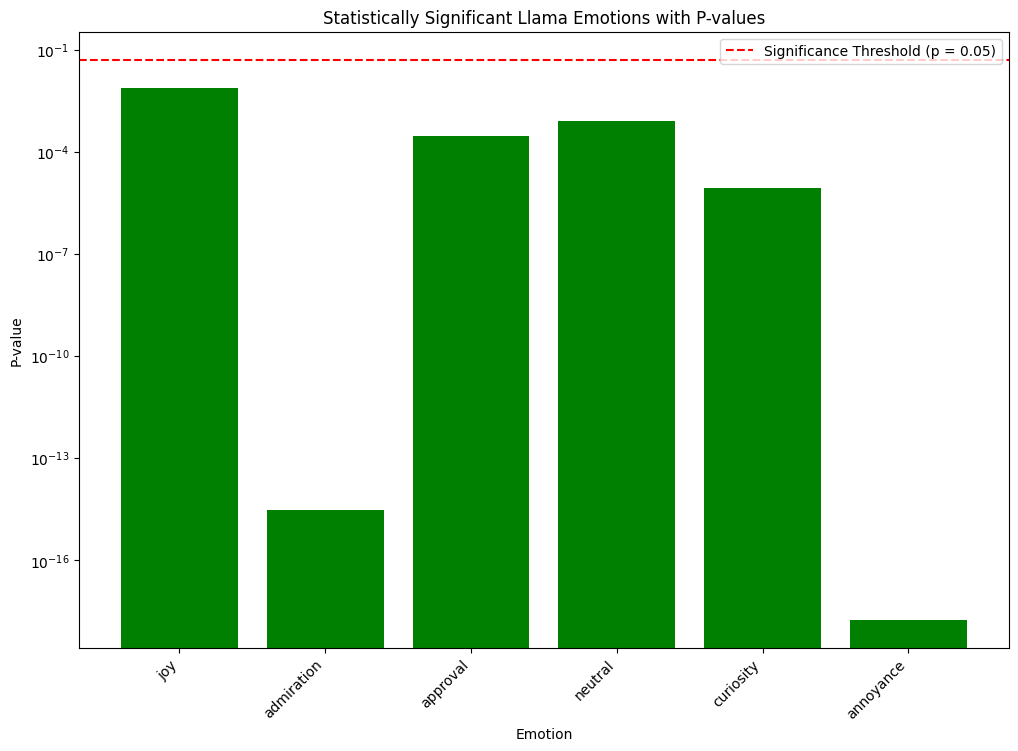

In [240]:
plt.figure(figsize=(12, 8))
plt.bar(significance_results, p_value_results, color='green')
plt.title('Statistically Significant Llama Emotions with P-values')
plt.xlabel('Emotion')
plt.ylabel('P-value')
plt.yscale('log')  # Use logarithmic scale for better visualization of p-values
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels for better readability
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (p = 0.05)')  # Add significance threshold line
plt.legend()
plt.show()

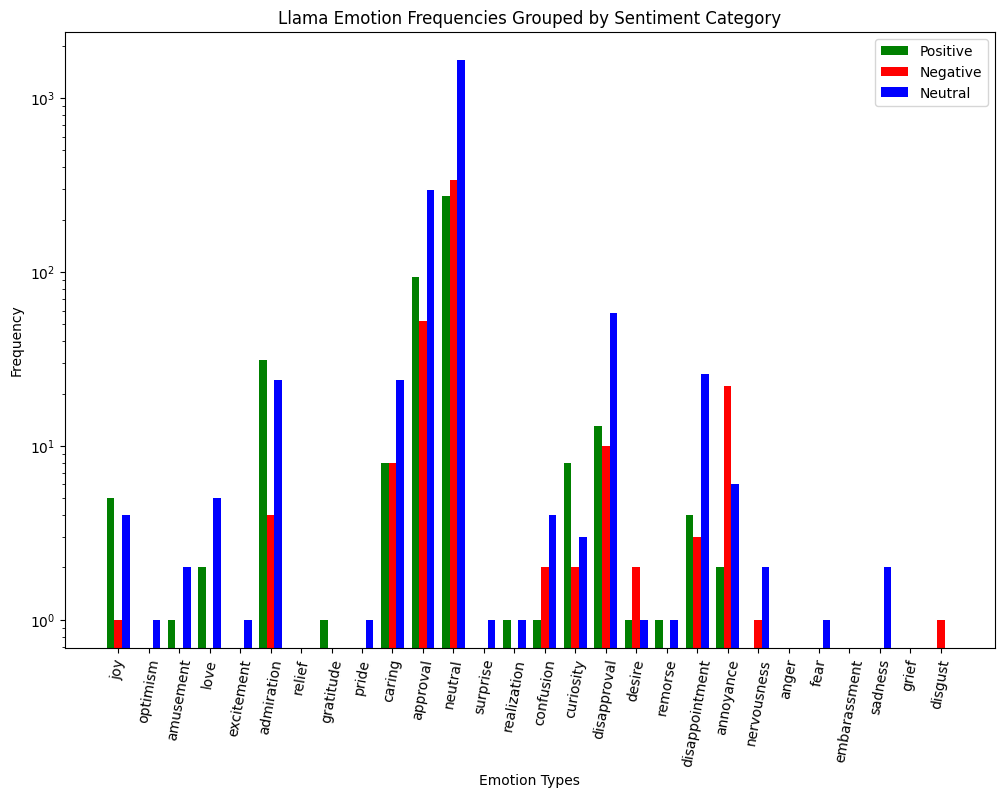

In [241]:
# Data for emotion frequencies across different sentiment categories
sentiments = list(sentiment_frequency_ll.keys())
emotion_types = list(emotion_sentiment_mapping.keys())
num_emotions = len(emotion_types)

# Prepare data for the grouped bar chart
positive_emotions = [emotion_frequency_ll['positive'].get(emotion, 0) for emotion in emotion_types]
negative_emotions = [emotion_frequency_ll['negative'].get(emotion, 0) for emotion in emotion_types]
neutral_emotions = [emotion_frequency_ll['neutral'].get(emotion, 0) for emotion in emotion_types]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bars
bar_width = 0.25
index = np.arange(num_emotions)

# Plotting the grouped bar chart
bar1 = ax.bar(index - bar_width, positive_emotions, bar_width, label='Positive', color='green')
bar2 = ax.bar(index, negative_emotions, bar_width, label='Negative', color='red')
bar3 = ax.bar(index + bar_width, neutral_emotions, bar_width, label='Neutral', color='blue')

# Add labels, title, and legend
ax.set_xlabel('Emotion Types')
ax.set_ylabel('Frequency')
plt.yscale('log')  # Set y-axis scale to logarithmic
ax.set_title('Llama Emotion Frequencies Grouped by Sentiment Category')
ax.set_xticks(index)
ax.set_xticklabels(emotion_types, rotation=80)

# Add a legend for sentiment categories
ax.legend(['Positive', 'Negative', 'Neutral'])

# Show the plot
plt.show()

[  3.52159468  -0.47840532  -3.04318937  22.27740864  -4.72259136
 -17.55481728  28.95016611 -13.04983389 -15.90033223 -63.00664452
   0.99335548  62.01328904   6.07807309   0.07807309  -6.15614618
  -2.43521595  17.56478405 -15.12956811]


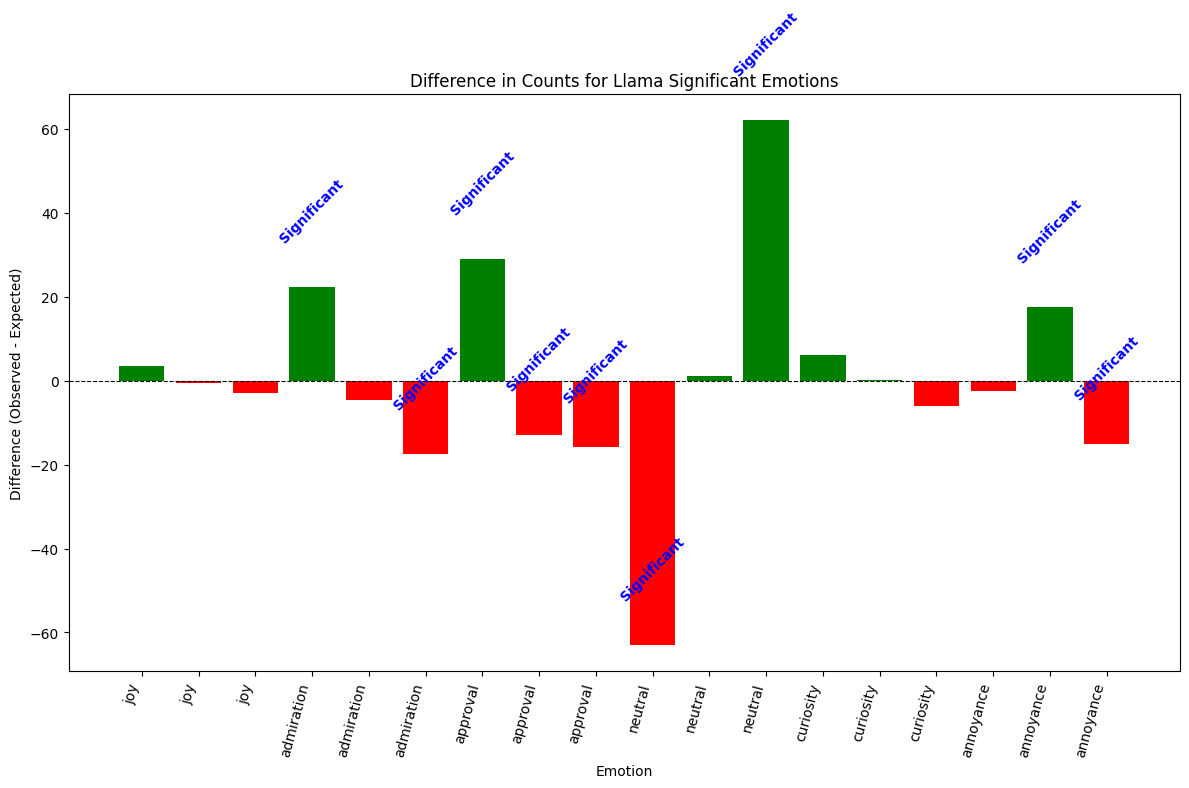

In [242]:
import matplotlib.pyplot as plt

# Calculate the difference between observed and expected counts
difference = np.array(sig_actual_counts) - np.array(sig_expected_counts)

# Flatten the difference array to a 1D array
difference_flat = difference.flatten()
print(difference_flat)

# Define sentiments and corresponding indices for bar plotting
sentiments = ['Positive', 'Negative', 'Neutral']
indices = np.arange(len(significance_results) * len(sentiments))  # Indices for x-axis positions

# Define colors based on the sign of the difference
bar_colors = np.where(difference_flat > 0, 'green', 'red')

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(indices, difference_flat, color=bar_colors)

# Add labels, title, and legend
plt.xlabel('Emotion')
plt.ylabel('Difference (Observed - Expected)')
plt.title('Difference in Counts for Llama Significant Emotions')
emotions_repeated = np.repeat(significance_results, 3)
# plt.xticks(indices, np.tile(significance_results, len(sentiments)), rotation=45, ha='right')  # Set x-axis labels
plt.xticks(indices, emotions_repeated, rotation=75, ha='right')  # Set x-axis labels
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add horizontal line at y=0

# Add annotations for significant differences
for i, bar, diff in zip(indices, bars, difference_flat):
    if np.abs(diff) > 0.05 * np.mean(sig_expected_counts):
        plt.text(i, bar.get_height() + 10, 'Significant', ha='center', va='bottom', color='blue', weight='bold', rotation=45,)

plt.tight_layout()
plt.show()


Zephyr

In [243]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

# Initialize the text classification pipeline for emotion analysis (Go emotions from Hugging Face)
# (see link above)
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=5)

# Define the mapping of emotions to sentiment categories
# From Go Emotions dataset (see link above)
emotion_sentiment_mapping = {
    'joy': 'positive',
    'optimism': 'positive',
    'amusement': 'positive',
    'love': 'positive',
    'excitement': 'positive',
    'admiration': 'positive',
    'relief': 'positive',
    'gratitude': 'positive',
    'pride': 'positive',
    'caring': 'positive',
    'approval': 'positive',
    'neutral': 'neutral',
    'surprise': 'neutral',
    'realization': 'neutral',
    'confusion': 'neutral',
    'curiosity': 'neutral',
    'disapproval': 'negative',
    'desire': 'negative',
    'remorse': 'negative',
    'disappointment': 'negative',
    'annoyance': 'negative',
    'nervousness': 'negative',
    'anger': 'negative',
    'fear': 'negative',
    'embarassment': 'negative',
    'sadness': 'negative',
    'grief': 'negative',
    'disgust': 'negative',
}

# Initialize count var for batch logging progress
count = 0

sentiment_frequency_ze = {
    'positive': 92,
    'negative': 94,
    'neutral': 435
}

emotion_frequency_ze = {
    'positive': {
        'approval': 122,
        'neutral': 288,
        'caring': 15,
        'disappointment': 2,
        'admiration': 13,
        'curiosity': 3,
        'confusion': 3,
        'desire': 1,
        'disapproval': 4,
        'realization': 1,
        'joy': 6,
        'sadness': 1,
        'annoyance': 1
    },
    'negative': {
        'neutral': 297,
        'approval': 112,
        'caring': 9,
        'disappointment': 2,
        'joy': 10,
        'disapproval': 6,
        'admiration': 10,
        'curiosity': 3,
        'sadness': 5,
        'confusion': 7,
        'optimism': 3,
        'annoyance': 2,
        'nervousness': 1,
        'desire': 1,
        'realization': 2
    },
    'neutral': {
        'neutral': 1463,
        'disapproval': 40,
        'optimism': 12,
        'approval': 478,
        'admiration': 36,
        'caring': 35,
        'nervousness': 4,
        'realization': 8,
        'confusion': 24,
        'fear': 3,
        'joy': 13,
        'love': 2,
        'sadness': 8,
        'annoyance': 6,
        'disappointment': 11,
        'curiosity': 10,
        'anger': 2,
        'excitement': 2,
        'gratitude': 3,
        'remorse': 5,
        'desire': 6,
        'amusement': 1
    }
}

# # Create a dictionary to store sentiment frequencies
# sentiment_frequency = {'positive': 0, 'negative': 0, 'neutral': 0}

# # Create a dictionary to store emotion frequencies for each sentiment category
# emotion_frequency = {'positive': {}, 'negative': {}, 'neutral': {}}

def is_statistically_significant(sentiment_counts, sentiment_frequency):
    # Calculate the sum of observed frequencies (ie how many times did the emotion show up across all types of posts)
    observed_sum = sentiment_counts.sum()

    # Calculate the total number of posts
    total_posts = sum(sentiment_frequency.values())

    # Calculate expected proportions based on post distribution
    if total_posts > 0:
        expected_proportions = np.array([sentiment_frequency[key] / total_posts for key in sentiment_frequency.keys()])
        expected_counts = expected_proportions * observed_sum

    # Perform chi-squared test
    chi2_stat, p_val = chisquare(sentiment_counts, f_exp=expected_counts)

    # Determine if the test is statistically significant based on the p-value
    if p_val < 0.05:  # You can adjust the significance level (alpha) as needed
        print(f"Expected counts would have been: {expected_counts}")
        sig_expected_counts.append(expected_counts)
        print(f"Actual counts were: {sentiment_counts}")
        sig_actual_counts.append(sentiment_counts)
        return True, chi2_stat, p_val
    else:
        return False, chi2_stat, p_val

# # Iterate over each row in the DataFrame
# for index, row in df_ze.iterrows():
#     # Log Progress every 200 batches
#     # if (count / 5) > 199:
#     #     break;
#     if (count / 5) % 25 == 0:
#       print(f"Number of Posts analyzed: {int(count / 5)}")
#       print(" Post Sentiment Distribution")
#       print(sentiment_frequency)
#       print("")
#     # if (count / 5) % 5 == 0:
#     #   print(f"Number of Posts analyzed: {int(count / 5)}")
#     #   print(" Post Sentiment Distribution")
#     #   print(sentiment_frequency)
#     #   print("")

#     #   print(" Comment Emotion Distribution for Posts")
#     #   print(emotion_frequency)
#     #   print("")

#     # Process the post body for sentiment analysis
#     post_body = str(row['Query'])

#     # Truncate post_body if it exceeds 512 characters
#     post_body = post_body[:512]

#     if post_body:
#         # print(post_body)
#         # print("")
#         # Analyze emotions of the post body
#         emotions = classifier(post_body)

#         # Make sure we have emotions for the post
#         if emotions and len(emotions) > 0 and count % 5 == 0:
#             # print(post_body)
#             # Grab the top emotion for the post body
#             top_emotion_post = emotions[0][0]['label']
#             # print("")
#             # print(top_emotion_post)
#             # print("")

#             # print(top_emotion_post)
#             # print("")
#             # print("")
#             if top_emotion_post in emotion_sentiment_mapping:
#                 # Convert that top emotion into a sentiment (positive/neutral/negative)
#                 # for later analysis
#                 post_sentiment = emotion_sentiment_mapping[top_emotion_post]

#                 # Update sentiment frequency of posts
#                 sentiment_frequency[post_sentiment] += 1
#             # print(sentiment_frequency)

#         response = row[f'Response']
#         if isinstance(response, str):
#             response = response[:512]
#             # print(response)

#             output = classifier(response)
#             # print(output)
#             # Grab emotion labels for each output
#             top_emotion_comment = output[0][0]['label']
#             # Update emotion frequency dictionary
#             if top_emotion_comment not in emotion_frequency[post_sentiment]:
#                 # If the emotion does not exist, set freq to be 1 for the emotion
#                 emotion_frequency[post_sentiment][top_emotion_comment] = 1
#             else:
#                 # Otherwise increment the current count for the emotion
#                 emotion_frequency[post_sentiment][top_emotion_comment] += 1

#         # increment our overall count that does batch logging
#         count += 1

# Define the sentiment categories in the desired order
sentiment_categories = ['positive', 'negative', 'neutral']

# Define the complete list of emotions from the mapping
all_emotions = list(emotion_sentiment_mapping.keys())

# Initialize the contingency table with zeros
contingency_table = np.zeros((len(sentiment_categories), len(all_emotions)), dtype=int)

# Populate the contingency table with emotion frequencies
for i, sentiment in enumerate(sentiment_categories):
    for j, emotion in enumerate(all_emotions):
        if emotion in emotion_frequency_ze[sentiment]:
            contingency_table[i, j] = emotion_frequency_ze[sentiment][emotion]

# Emotion of interest (column index)
emotion_index = 0
significance_results = []
sig_expected_counts = []
sig_actual_counts = []
p_value_results = []

# Extract all sentiment values for the specified emotion (column)
for emotion in emotion_sentiment_mapping:
  # print(emotion_index)
  # print(emotion)
  sentiment_counts = contingency_table[:, emotion_index]
  # print(sentiment_counts)

  if np.all(sentiment_counts >= 1):
      is_significant, chi2_stat, p_val = is_statistically_significant(sentiment_counts, sentiment_frequency_ze)

      print(f"Is the difference statistically significant? for emotion : {emotion}")
      if is_significant:
        print("Yes, it was significant")
        significance_results.append(emotion)
        p_value_results.append(p_val)
      else:
        print("No, it was not significant")
  else:
      print(f"Not enough information to perform the chi-squared test for emotion: {emotion}")

  emotion_index += 1

print("Final Post Sentiment Distribution")
print(sentiment_frequency)
print("")

print("Final Comment Emotion Distribution for Posts")
print(emotion_frequency)
print("")

Expected counts would have been: [ 4.2962963   4.38969404 20.31400966]
Actual counts were: [ 6 10 13]
Is the difference statistically significant? for emotion : joy
Yes, it was significant
Not enough information to perform the chi-squared test for emotion: optimism
Not enough information to perform the chi-squared test for emotion: amusement
Not enough information to perform the chi-squared test for emotion: love
Not enough information to perform the chi-squared test for emotion: excitement
Is the difference statistically significant? for emotion : admiration
No, it was not significant
Not enough information to perform the chi-squared test for emotion: relief
Not enough information to perform the chi-squared test for emotion: gratitude
Not enough information to perform the chi-squared test for emotion: pride
Is the difference statistically significant? for emotion : caring
No, it was not significant
Is the difference statistically significant? for emotion : approval
No, it was not sign

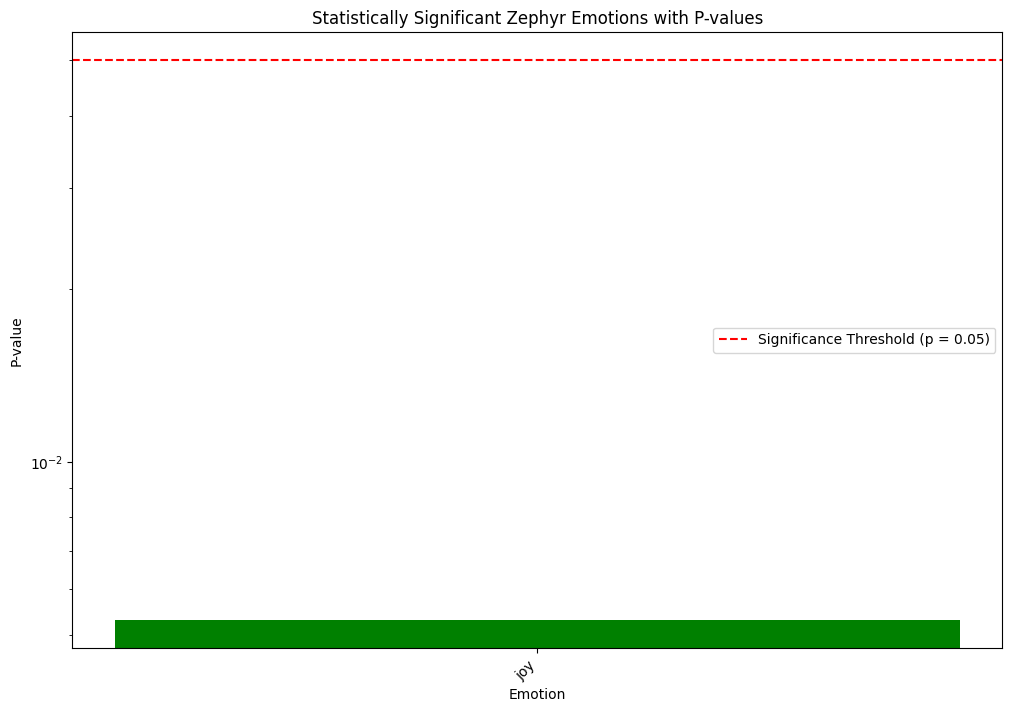

In [244]:
plt.figure(figsize=(12, 8))
plt.bar(significance_results, p_value_results, color='green')
plt.title('Statistically Significant Zephyr Emotions with P-values')
plt.xlabel('Emotion')
plt.ylabel('P-value')
plt.yscale('log')  # Use logarithmic scale for better visualization of p-values
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels for better readability
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (p = 0.05)')  # Add significance threshold line
plt.legend()
plt.show()

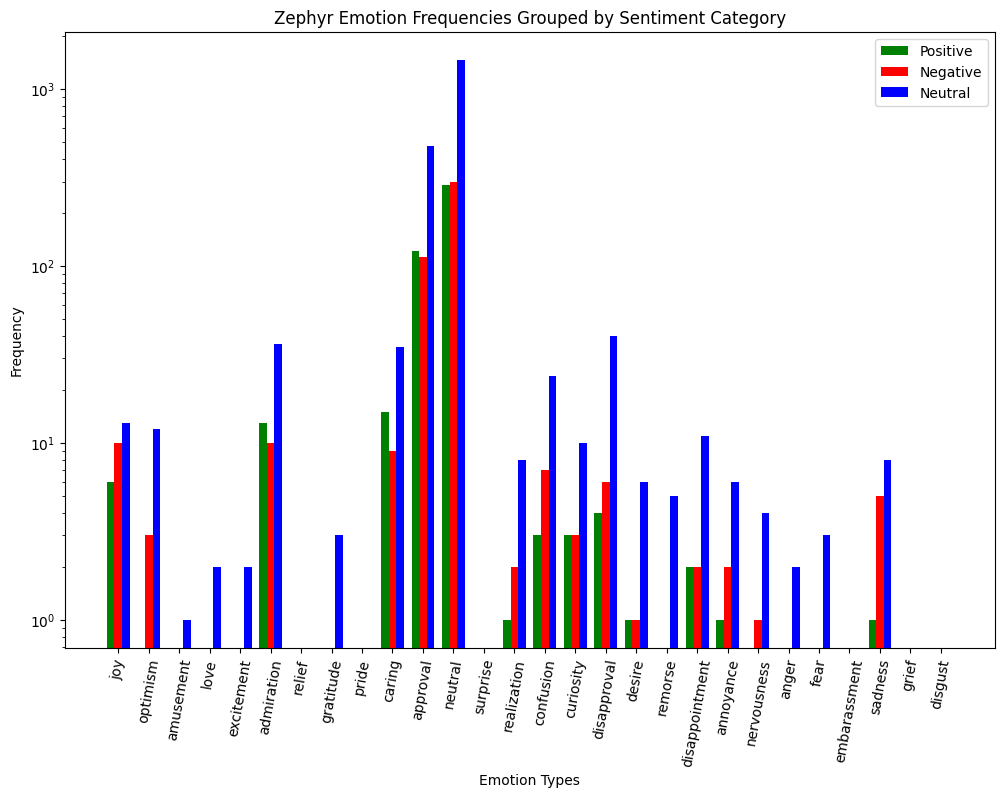

In [245]:
# Data for emotion frequencies across different sentiment categories
sentiments = list(sentiment_frequency_ze.keys())
emotion_types = list(emotion_sentiment_mapping.keys())
num_emotions = len(emotion_types)

# Prepare data for the grouped bar chart
positive_emotions = [emotion_frequency_ze['positive'].get(emotion, 0) for emotion in emotion_types]
negative_emotions = [emotion_frequency_ze['negative'].get(emotion, 0) for emotion in emotion_types]
neutral_emotions = [emotion_frequency_ze['neutral'].get(emotion, 0) for emotion in emotion_types]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bars
bar_width = 0.25
index = np.arange(num_emotions)

# Plotting the grouped bar chart
bar1 = ax.bar(index - bar_width, positive_emotions, bar_width, label='Positive', color='green')
bar2 = ax.bar(index, negative_emotions, bar_width, label='Negative', color='red')
bar3 = ax.bar(index + bar_width, neutral_emotions, bar_width, label='Neutral', color='blue')

# Add labels, title, and legend
ax.set_xlabel('Emotion Types')
ax.set_ylabel('Frequency')
plt.yscale('log')  # Set y-axis scale to logarithmic
ax.set_title('Zephyr Emotion Frequencies Grouped by Sentiment Category')
ax.set_xticks(index)
ax.set_xticklabels(emotion_types, rotation=80)

# Add a legend for sentiment categories
ax.legend(['Positive', 'Negative', 'Neutral'])

# Show the plot
plt.show()

[ 1.7037037   5.61030596 -7.31400966]


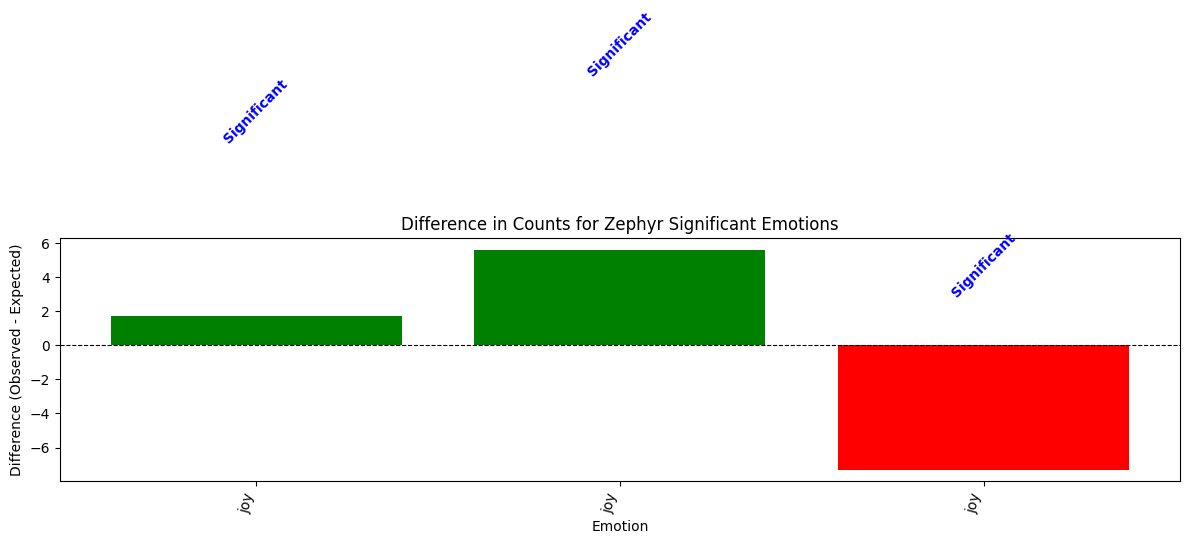

In [246]:
import matplotlib.pyplot as plt

# Calculate the difference between observed and expected counts
difference = np.array(sig_actual_counts) - np.array(sig_expected_counts)

# Flatten the difference array to a 1D array
difference_flat = difference.flatten()
print(difference_flat)

# Define sentiments and corresponding indices for bar plotting
sentiments = ['Positive', 'Negative', 'Neutral']
indices = np.arange(len(significance_results) * len(sentiments))  # Indices for x-axis positions

# Define colors based on the sign of the difference
bar_colors = np.where(difference_flat > 0, 'green', 'red')

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(indices, difference_flat, color=bar_colors)

# Add labels, title, and legend
plt.xlabel('Emotion')
plt.ylabel('Difference (Observed - Expected)')
plt.title('Difference in Counts for Zephyr Significant Emotions')
emotions_repeated = np.repeat(significance_results, 3)
# plt.xticks(indices, np.tile(significance_results, len(sentiments)), rotation=45, ha='right')  # Set x-axis labels
plt.xticks(indices, emotions_repeated, rotation=75, ha='right')  # Set x-axis labels
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add horizontal line at y=0

# Add annotations for significant differences
for i, bar, diff in zip(indices, bars, difference_flat):
    if np.abs(diff) > 0.05 * np.mean(sig_expected_counts):
        plt.text(i, bar.get_height() + 10, 'Significant', ha='center', va='bottom', color='blue', weight='bold', rotation=45,)

plt.tight_layout()
plt.show()